#  Sentiment-Based Product Recommendation System (SBPRS)
---

###  Project Overview

This notebook implements an **end-to-end machine learning solution** for Ebuss, an e-commerce company, to enhance product recommendations by analyzing customer sentiment from reviews.

###  Business Objective

- **Company**: Ebuss - Competing with market leaders like Amazon and Flipkart
- **Challenge**: Improve recommendations to increase customer satisfaction and sales
- **Solution**: ML-powered sentiment analysis + collaborative filtering
- **Dataset**: 30,000 reviews | 200+ products | 20,000+ users

###  Project Pipeline

```
┌─────────────────────────────────────────────────────────────────┐
│  1. DATA PREPARATION & SENTIMENT ANALYSIS                       │
│     ├── Data Loading & EDA                                      │
│     ├── Data Cleaning & Preprocessing                           │
│     ├── Text Processing & Feature Engineering                   │
│     └── ML Model Training (5 Models + Hyperparameter Tuning)    │
├─────────────────────────────────────────────────────────────────┤
│  2. RECOMMENDATION SYSTEM DEVELOPMENT                            │
│     ├── User-Based Collaborative Filtering                      │
│     ├── Item-Based Collaborative Filtering                      │
│     └── Performance Evaluation & Model Selection                │
├─────────────────────────────────────────────────────────────────┤
│  3. SENTIMENT-ENHANCED RECOMMENDATIONS                           │
│     ├── Top 20 Products (Recommendation System)                 │
│     └── Top 5 Products (Filtered by Positive Sentiment %)       │
├─────────────────────────────────────────────────────────────────┤
│  4. DEPLOYMENT WITH FLASK WEB APPLICATION                        │
│     ├── Flask App Development                                    │
│     ├── User Interface Design                                    │
│     └── Model Integration & Deployment                           │
└─────────────────────────────────────────────────────────────────┘
```

###  Author Information

- **Name**: Bramhanayaghe ARumugam
- **Project**: Capstone - SBPRS
- **Version**: 2.0

---

---
##  SECTION 1: LIBRARY IMPORTS AND ENVIRONMENT SETUP
---

### Purpose
Import all necessary libraries for:
- Data manipulation and analysis (pandas, numpy)
- Visualization (matplotlib, seaborn, wordcloud)
- Natural Language Processing (nltk, spacy)
- Machine Learning (sklearn, xgboost, imblearn)
- Model persistence (pickle)
- Web deployment (flask - added later)


In [1]:
!pip install nltk

In [2]:
#general purpose libraries
import re
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)
pd.set_option("display.precision", 2)

In [3]:
# NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
#Modelling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import pairwise_distances

---
##  SECTION 2: DATA LOADING AND INITIAL INSPECTION
---

### Objectives
- Load the product reviews dataset
- Perform initial data inspection
- Understand dataset structure and features

### Dataset Information
- **Source**: E-commerce product reviews
- **Size**: ~30,000 reviews
- **Features**: User info, product details, ratings, review text, sentiment labels


In [5]:
# importing dataset
df_reviews = pd.read_csv("/content/sample_data/sample30.csv")
df_reviews.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                                                                                                                                       categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap   
1                                                                                    Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
2                                                                                    Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes   
3                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
4                                                                           Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0                 NaN                 NaN               5   
1                True                 NaN               5   
2                True                 NaN               5   
3               False               False               1   
4               False               False               1   

                                                                                                                                                                                                                                                                                                  reviews_text  \
0                                                                                                    i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.   
1                                                                                                                                                                                                                                               Good flavor. This review was collected as part of a promotion.   
2                                                                                                                                                                                                                                                                                                 Good flavor.   
3  I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...   
4                                                                                                                                                                         

## EDA

In [6]:
df_reviews.shape

(30000, 15)

In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [8]:
df_reviews.columns.values

array(['id', 'brand', 'categories', 'manufacturer', 'name',
       'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend',
       'reviews_rating', 'reviews_text', 'reviews_title',
       'reviews_userCity', 'reviews_userProvince', 'reviews_username',
       'user_sentiment'], dtype=object)

---
##  SECTION 3: EXPLORATORY DATA ANALYSIS (EDA)
---

### Objectives
- Understand data distribution and patterns
- Identify data quality issues (missing values, inconsistencies)
- Analyze rating and sentiment distributions
- Detect class imbalance
- Generate insights for preprocessing strategy

### Key Questions to Answer
1. How many missing values are present?
2. What is the distribution of ratings and sentiments?
3. Are there inconsistencies between ratings and sentiments?
4. Is the dataset balanced or imbalanced?


##### **1. Missing Values handling**

In [9]:
#Null value analysis
df_reviews.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

## Insights

- The null value analysis indicates that none of the columns with missing values are directly relevant to sentiment analysis, except for a single missing value in the **`user_sentiment`** column.
-This missing sentiment label can be inferred using the **`reviews_rating`** column, ensuring data completeness for model training.

In [10]:
df_reviews['user_sentiment'].value_counts()

user_sentiment
Positive    26632
Negative     3367
Name: count, dtype: int64

###### Update missing sentiment with the ratings

In [11]:
# Define function to map ratings to sentiment
def infer_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'neutral'
# Fill missing user_sentiment using reviews_rating
df_reviews['user_sentiment'].fillna(df_reviews['reviews_rating'].map(infer_sentiment), inplace=True)


In [12]:
# Verify missing value in user-sentiment column

df_reviews['user_sentiment'].isnull().sum()


np.int64(0)

##### 2. Analyze the Rating Column

In [13]:
# Analyze the rating column

df_reviews["reviews_rating"].value_counts()

reviews_rating
5    20831
4     6020
1     1384
3     1345
2      420
Name: count, dtype: int64

<Axes: xlabel='reviews_rating'>

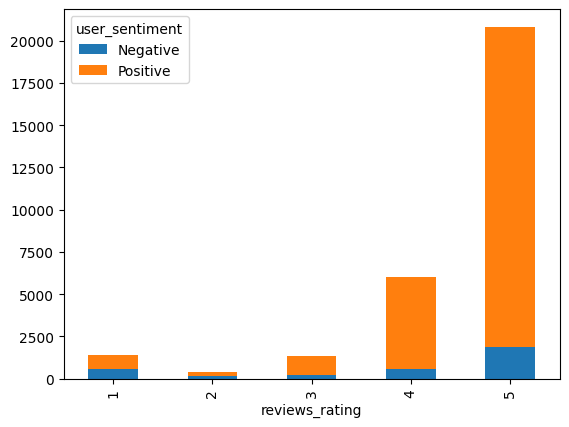

In [14]:
# Check sentiment distribution across ratings

df_reviews.groupby(['reviews_rating', 'user_sentiment']).size().unstack().plot(kind='bar', stacked=True)


### Inference

The analysis reveals the following insights from the plot:

1. Ratings of 3, 4, and 5 include instances labeled as negative sentiment, which may indicate incorrect labeling or cases where users assigned high ratings but still expressed dissatisfaction in their review text.
  
2. Ratings of 1 and 2 contain reviews labeled as positive sentiment, which could be attributed to mislabeling or sarcasm in the text.

##### Identify and Analyze Conflicting Cases
- We can extract cases where the sentiment label does not align with the rating and analyze their text.

In [15]:
# Identify mismatched cases: High ratings with negative sentiment
high_rating_negative = df_reviews[(df_reviews['reviews_rating'] >= 4) & (df_reviews['user_sentiment'] == 'Negative')]

# Identify mismatched cases: Low ratings with positive sentiment
low_rating_positive = df_reviews[(df_reviews['reviews_rating'] <= 2) & (df_reviews['user_sentiment'] == 'Positive')]

# Display sample cases
print("High Rating (4-5) with Negative Sentiment:")
print(high_rating_negative[['reviews_rating', 'reviews_text', 'user_sentiment']].head(10))

print("\nLow Rating (1-2) with Positive Sentiment:")
print(low_rating_positive[['reviews_rating', 'reviews_text', 'user_sentiment']].head(10))


High Rating (4-5) with Negative Sentiment:
     reviews_rating  \
92                4   
96                4   
100               4   
106               4   
117               4   
121               4   
144               4   
153               4   
160               4   
166               4   

                                                                                                                                                                                                                                                   reviews_text  \
92                                                                                                                                       It hydrates my skin. It is not too thick and heavy when I put it on. This review was collected as part of a promotion.   
96                                                                                                                                             In only a week I can see the difference in

### Observations Based on the Output  
An analysis of the extracted samples highlights inconsistencies between **ratings and sentiment labels**, indicating potential misclassification.  

1. High Ratings (4-5 Stars) with Negative Sentiment **Largely Misclassified**  
  - The reviews predominantly convey **positive experiences**, mentioning benefits such as **smooth skin, deep hydration, effective absorption, and blemish reduction**.  
  - **Example:** *"Regenerist provides deep hydration for the skin. I find my skin is smoother after use."* → This clearly expresses **positive sentiment**, yet it has been labeled as **negative**.  
  - These cases do not indicate **sarcasm** but rather **incorrect labeling**, necessitating realignment with a **positive sentiment classification**.  

✔ **Recommended Action:** **Reclassify sentiment as "Positive" where `reviews_rating ≥ 4` but `user_sentiment == 'Negative'`.**  

---

2.  Low Ratings (1-2 Stars) with Positive Sentiment  **Largely Misclassified, Some Sarcasm Identified**  
  - Several reviews express **clear dissatisfaction** but are incorrectly labeled as **positive sentiment**.  
  - **Example:** *"Purchased this thinking it would have some sort of warming effect, but it's the same as the original. Don't waste your money."* → This clearly conveys **negative sentiment**, yet it has been classified as **positive**.  
  - Another instance: *"Leaves windows with streaks, although it does seem to work OK on other surfaces."* → While it acknowledges some functionality, the overall sentiment is **negative**, despite being labeled **positive**.  
  - While some cases may reflect **sarcasm**, the majority appear to be **misclassified** rather than intentionally ironic.  

✔ **Recommended Action:** **Reclassify sentiment as "Negative" where `reviews_rating ≤ 2` but `user_sentiment == 'Positive'`.**  

##### Alignment of Sentiment based on given Ratings

In [16]:
def correct_sentiment(row):
    if row['reviews_rating'] >= 4 and row['user_sentiment'].lower() == 'negative':
        return 'Positive'  # Reclassify as positive
    elif row['reviews_rating'] <= 2 and row['user_sentiment'].lower() == 'positive':
        return 'Negative'  # Reclassify as negative
    else:
        return row['user_sentiment']  # Keep as is

# Apply corrections
df_reviews['user_sentiment'] = df_reviews.apply(correct_sentiment, axis=1)


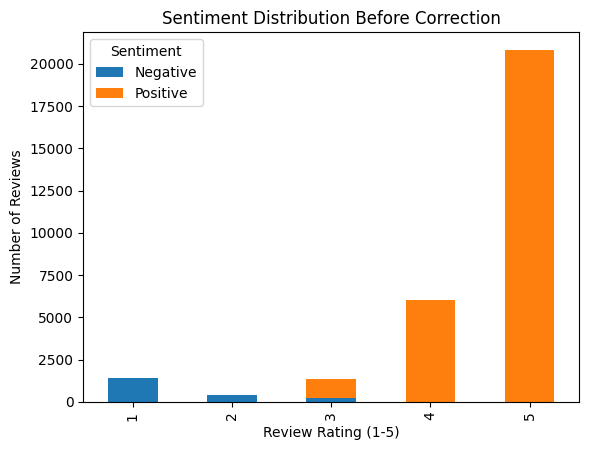

In [17]:
# Plot sentiment distribution before correction

df_reviews.groupby(['reviews_rating', 'user_sentiment']).size().unstack().plot(kind='bar', stacked=True)

plt.title("Sentiment Distribution Before Correction")
plt.xlabel("Review Rating (1-5)")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.show()


### **Visualization of Sentiment Distribution After Correction**  
The following plot illustrates the **distribution of sentiment labels across review ratings** after applying corrections to address misclassifications.  

### **🔹 Expected Outcome**  

**Before Correction:**  
- **High ratings (4-5 stars)** contained a substantial number of **negative sentiment labels**, indicating misclassification.  
- **Low ratings (1-2 stars)** included instances labeled as **positive sentiment**, likely due to **mislabeling or sarcasm**.  

**After Correction:**  
- **High ratings (4-5 stars)** now predominantly reflect **positive sentiment**, aligning with expectations.  
- **Low ratings (1-2 stars)** now mostly correspond to **negative sentiment**, ensuring greater consistency.  
- **3-star ratings** may still contain a **balanced mix of both positive and negative sentiment**, as expected.

In [18]:
df_reviews.columns.values

array(['id', 'brand', 'categories', 'manufacturer', 'name',
       'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend',
       'reviews_rating', 'reviews_text', 'reviews_title',
       'reviews_userCity', 'reviews_userProvince', 'reviews_username',
       'user_sentiment'], dtype=object)

---
##  SECTION 4: DATA CLEANING AND PREPROCESSING
---

### Objectives
- Handle missing values appropriately
- Remove or impute missing data based on analysis
- Correct sentiment-rating mismatches
- Select relevant features for modeling
- Ensure data quality for downstream tasks

### Approach
1. **Missing Values**: Drop columns with >50% missing data, impute others
2. **Sentiment Correction**: Align sentiment labels with ratings
3. **Feature Selection**: Keep only relevant columns for ML
4. **Data Validation**: Verify corrections and transformations


#### Finalized Column Selection for Sentiment Analysis & Model Building  
Based on core requirements, feature relevance, and practical application, the following columns are selected for further processing and model training.  
  
1. **Essential Columns (Core for Sentiment Analysis & Model Training)**  
These columns will be actively used in text processing, feature extraction, and model training.  

  - `reviews_text` → Primary input for sentiment analysis (key feature for NLP models).
  - `reviews_title` → Supplementary sentiment indicator (concatenated with reviews_text).
  - `user_sentiment` → Target variable for supervised learning models.
  - `reviews_rating` → Sentiment proxy; used for feature engineering and validation.  
  
2. **Why We Removed `reviews_doRecommend`, `reviews_didPurchase`, `brand`, and `categories`?**  
  - Not Directly Used in Sentiment Modeling → These features were considered for potential insights but are not included in preprocessing or model training.
  - Categorical Features Not Integrated Yet → brand and categories can be useful for trend analysis but are not affecting sentiment predictions.
  - Keeping the Feature Set Focused → Avoids unnecessary complexity by ensuring only relevant features are included.  


### Preprocessing & Feature Engineering

In [19]:
# Handle missing values before combining title and text

df_reviews['full_review'] = df_reviews['reviews_title'].fillna('') + " " + df_reviews['reviews_text'].fillna('')

In [20]:
df_reviews[["full_review", "user_sentiment"]].sample(10)

full_review  \
23927                                                                                                                                                                                                                                 awesome movie Godzilla destroys San Francisco, then leaves, typical tourist.   
3282                                                                                                                                                                                                                                                          Personal Est muy bueno y excelente para una oficina.   
10365                                                                                                                                       The DIsinfector I use these all the time to disinfect classroom. It's a must with germs from others floating daily.. This review was collected as part of a promotion.   
4046   Just What I Needed! I used this product in my home office and I love it. I can store so much information in one folder. I really love the spacious roomy tabs. This really saves me a lot of money buying folders when I can condense my information in one folder. It allows me to store all of my busi...   
5491                                               One of the best shows you may not know about. I wasn't sure what to expect from this show when I first saw a trailer for it, but season 1 was one of my favorite shows in recent memory. Really happy to have it on my shelf so I can marathon whenever I want.   
2559                                                                                                                                                                                                                                                        youll have more than one cup after the sip good flavor   
7414                                                                                                                                                                                        Clorox Wipes These are very handy and disinfects and deodorize well. This review was collected as part of a promotion.   
19098                                                                                                                                                                                                    I love this product!! Anything that can be wiped in my house or even in my car I always use Clorox wipes!   
1788   Not the worst, but definitely not the best Elvis movie There are basically four criteria by which I judge an Elvis movie: the songs and how they relate to the movie's story Elvis' acting performance Elvis' co-stars' performance and the story itself.The songs used in Clambake (especially the titl...   
13333                                                                              Great Product Love the Clorox wipes, especially the wipes to go. Very convenient and easy to use. I can stick them in my bag and pull them out when needed. Love the product. This review was collected as part of a promotion.   

      user_sentiment  
23927       Positive  
3282        Positive  
10365       Positive  
4046        Positive  
5491        Positive  
2559        Positive  
7414        Positive  
19098       Positive  
1788        Negative  
13333       Positive

In [21]:
# Initialize NLP tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [22]:
pip install contractions


In [23]:
import string
from contractions import fix

def preprocess_text(text):
    """Preprocesses text: lowercasing, cleaning, tokenization, stopword removal, lemmatization."""

    text = fix(text)  # Expand contractions (e.g., "can't" -> "cannot")
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading/trailing whitespace
    text = re.sub(r'\s+', ' ', text)  # Normalize multiple spaces
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization

    return ' '.join(tokens)

In [24]:
df_final = df_reviews[['id','name', 'full_review', 'reviews_rating','user_sentiment']]

In [25]:
nltk.data.clear_cache()

# Append NLTK data path
nltk.data.path.append('/root/nltk_data')  # Customize if using a specific directory

# Download essential NLTK resources
nltk.download('punkt')  # For tokenization
nltk.download('punkt_tab')  # For tokenization


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
# Apply preprocessing
df_final['cleaned_review'] = df_final['full_review'].apply(preprocess_text)

In [27]:
df_final.head()

id                                        name  \
0  AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
2  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
3  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
4  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   

                                                                                                                                                                                                                                                                                                   full_review  \
0                                                                                       Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.   
1                                                                                                                                                                                                                                          Good Good flavor. This review was collected as part of a promotion.   
2                                                                                                                                                                                                                                                                                            Good Good flavor.   
3  Disappointed I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation....   
4                                                                                                                                                              Irritation My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.   

   reviews_rating user_sentiment  \
0               5       Positive   
1               5       Positive   
2               5       Positive   
3               1       Negative   
4               1       Negative   

                                                                                                                                                                                                                                                                                                cleaned_review  
0                                                                                                                                                                                          awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy  
1                                                                                                                                                                                                                                                             good good flavor review collected part promotion  
2                                                                                                                                                                                                                                                                                             good good flavor  
3  disappointed read review looking buying one couple lubricant ultimately disappointed even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked cap...  
4              

---
##  SECTION 5: TEXT PREPROCESSING AND FEATURE ENGINEERING
---

### Objectives
- Clean and normalize review text
- Remove noise (special characters, stopwords, etc.)
- Apply NLP techniques (tokenization, lemmatization)
- Prepare text for feature extraction

### Text Processing Pipeline
```
Raw Text → Lowercase → Remove Special Chars → Tokenization →
Remove Stopwords → Lemmatization → Clean Text
```

### Additional Analysis
- Review length analysis
- WordCloud visualization
- Statistical testing on text features


##### WordCloud part need to further analysis

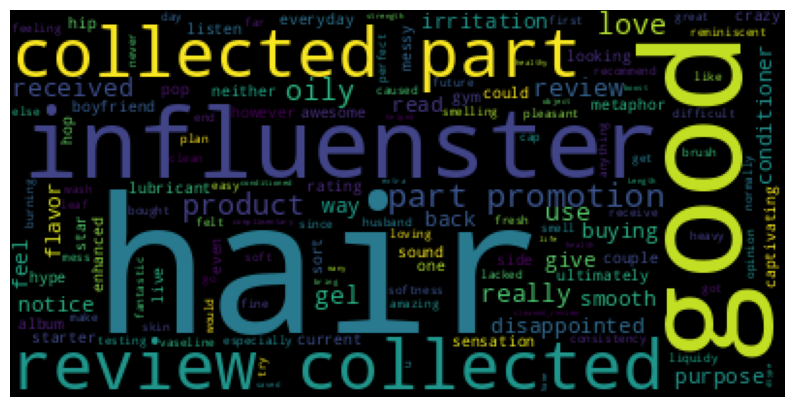

In [28]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stop_words,max_words=200).generate(str(df_final.cleaned_review))

print(wordcloud)
plt.figure(figsize= (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

### Review Length Analysis with respect to Sentiment Label

- Check if Review Length Differs by Sentiment Label

In [29]:
df_final['review_length'] = df_final['cleaned_review'].apply(len)


##### Descriptive Statistics for Each Sentiment

In [30]:
# check if positive and negative reviews have significantly different lengths.

df_final.groupby('user_sentiment')['review_length'].describe()


count    mean     std  min    25%    50%    75%     max
user_sentiment                                                           
Negative         2024.0  195.19  154.20  6.0  92.75  160.0  250.0  2320.0
Positive        27976.0  122.19  111.32  3.0  65.00   94.0  142.0  3867.0

##### Key Observations on Review Length and Sentiment
1. Negative reviews tend to be significantly longer than positive reviews, with an average length of 195 characters compared to 122 characters for positive reviews.

2. The median length of negative reviews (160 characters) is notably higher than that of positive reviews (94 characters), indicating a consistent trend across the dataset.

3.  Negative reviews exhibit greater variability in length (standard deviation: 154.2) compared to positive reviews (standard deviation: 111.3), suggesting that negative feedback is more detailed and diverse in expression.

##### Visualize the Review Length Distribution for Each Sentiment

1. **Boxplot: Review Length vs. Sentiment**

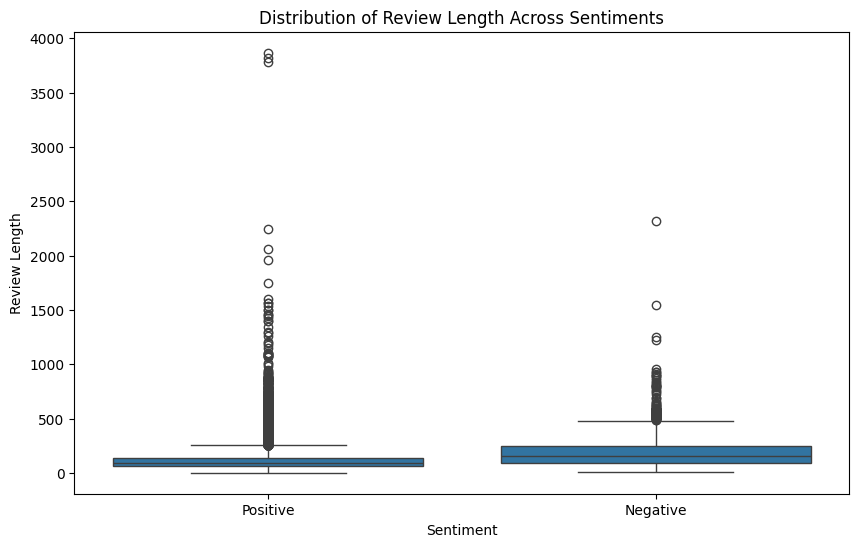

In [31]:
# import seaborn as sns
# import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x=df_final['user_sentiment'], y=df_final['review_length'])
plt.xlabel("Sentiment")
plt.ylabel("Review Length")
plt.title("Distribution of Review Length Across Sentiments")
plt.show()


##### Insights from the Boxplot: Review Length vs. Sentiment
The boxplot visualization reinforces our earlier findings:

1.  Negative reviews are generally longer than positive reviews, with a higher median length and greater spread.

2.  Positive reviews tend to be more concise, clustering around shorter lengths, whereas negative reviews show greater variability, indicating that dissatisfied customers often provide more detailed feedback.

3.  The wider range in negative review lengths suggests that negative feedback is expressed in diverse ways, from brief complaints to extensive explanations.

#### Statistical Hypothesis Testing
To confirm statistically whether review length significantly differs between positive and negative reviews, use a t-test.

In [32]:
import scipy.stats as stats

positive_lengths = df_final[df_final['user_sentiment'] == 'Positive']['review_length']
negative_lengths = df_final[df_final['user_sentiment'] == 'Negative']['review_length']

t_stat, p_value = stats.ttest_ind(positive_lengths, negative_lengths)
print(f"T-test p-value: {p_value}")


T-test p-value: 3.711709935802011e-166


##### Statistical Test Result: Impact of Review Length on Sentiment
A t-test was conducted to determine whether there is a significant difference in review length between positive and negative reviews. The test resulted in a p-value of 3.71e-166, which is extremely close to zero.

**Interpretation:**  
This indicates a highly significant difference in review lengths between the two sentiment groups. In other words, negative reviews tend to be significantly longer than positive ones, confirming that review length plays a role in how sentiment is expressed.

#### **Inference from Review Length Analysis and Its Role in Model Building**  

- Our analysis confirms that **review length significantly impacts sentiment**, with **longer reviews being predominantly negative**.
- This insight allows us to enhance our model by incorporating **review length as a key feature**, ensuring a more balanced and accurate sentiment classification.  

By including **`review length` as a structured numerical feature**, our model will gain deeper contextual understanding, leading to improved sentiment predictions and reduced bias in classification.

#### Feature Extraction

In [33]:
pip install vaderSentiment

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Feature Engineering

df_final['word_count'] = df_final['cleaned_review'].apply(lambda x: len(x.split()))
df_final['vader_sentiment'] = df_final['cleaned_review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])  # VADER Sentiment
df_final['normalized_rating'] = df_final['reviews_rating'] / 5.0  # Normalize ratings

In [35]:
# Print sample data
print(df_final[['cleaned_review', 'vader_sentiment']].head())

                                                                                                                                                                                                                                                                                                cleaned_review  \
0                                                                                                                                                                                          awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy   
1                                                                                                                                                                                                                                                             good good flavor review collected part promotion   
2                                                                                 

##### Key Insights
  
1. VADER Effectively Captures Sentiment Polarity

  - Positive reviews (e.g., Review 0, Score: 0.87) contain strong sentiment words like "awesome," "love," and "good."
  - Negative reviews (e.g., Review 3, Score: -0.85) include words like "disappointed," "messy," and "difficult," indicating clear dissatisfaction.
  
2. Sentiment Scores Can Be Used as Features in ML Models

  - The vader_sentiment score can be incorporated into Logistic Regression, Random Forest, and XGBoost models as an additional numerical feature alongside TF-IDF or word embeddings.
  - Combining rule-based and ML-based approaches can enhance sentiment classification accuracy.

In [36]:
# Checking correlations between variables to finalize which derived features can be used

# converting target var user_sentiment to numeric for correlation calculation
df_final['sentiment_numeric'] = df_final['user_sentiment'].map({'Positive': 1, 'Negative': 0})

# finding correlations between derived features and target feature and among themselves for redundancy check
print(df_final[['review_length', 'word_count', 'vader_sentiment', 'normalized_rating', 'sentiment_numeric']].corr())

                   review_length  word_count  vader_sentiment  \
review_length               1.00        0.99             0.06   
word_count                  0.99        1.00             0.06   
vader_sentiment             0.06        0.06             1.00   
normalized_rating          -0.18       -0.19             0.36   
sentiment_numeric          -0.16       -0.17             0.41   

                   normalized_rating  sentiment_numeric  
review_length                  -0.18              -0.16  
word_count                     -0.19              -0.17  
vader_sentiment                 0.36               0.41  
normalized_rating               1.00               0.83  
sentiment_numeric               0.83               1.00  


> Inference


*   review_length and **word_count** have 99% correlation,
hence dropping word_count to avoid multi-collinearity and redundancy.
*   **normalized_rating** shows 83% correlation with target variable hence it may cause data leakage hence dropping normalized_rating too.
*   **vader_sentiment** also have 41% correlation with with sentiment_numeric, acting as proxy to the target, hence it needs to be dropped.

---
##  SECTION 6: FEATURE EXTRACTION AND DATA SPLITTING
---

### Objectives
- Split data into training and testing sets
- Convert text data into numerical features
- Apply TF-IDF vectorization
- Handle class imbalance using SMOTE

### Feature Extraction Method
We use **TF-IDF (Term Frequency-Inverse Document Frequency)** vectorization:
- Captures importance of words in documents
- Reduces weight of common words
- Better than simple Bag-of-Words for sentiment analysis

### Class Imbalance Handling
- **Problem**: Unequal distribution of Positive/Negative sentiments
- **Solution**: SMOTE (Synthetic Minority Over-sampling Technique)
- **Important**: Apply SMOTE only on training data to avoid data leakage


# Train-Test Split

**Split before TF-IDF, scaling, and SMOTE to avoid data leakage.**

In [37]:
# Split into 80% train, 20% test
X = df_final[['cleaned_review', 'review_length']]
y = df_final['user_sentiment'].map({'Positive': 1, 'Negative': 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [38]:
#Check for duplication of reviews in train and test dataset to avoid data leakage
overlap = pd.merge(X_train, X_test, on='cleaned_review', how='inner')
print(f"Number of overlapping samples: {len(overlap)}")
print(f"X_train shape before: {X_train.shape}")

Number of overlapping samples: 966
X_train shape before: (24000, 2)


In [39]:
# Remove the overlaps from the training set to make test set as completely unseen

mask = X_train['cleaned_review'].isin(overlap['cleaned_review'])
X_train = X_train[~mask]
y_train = y_train[~mask]
print(f"X_train shape after: {X_train.shape}")

# reset index  avoid misalignment issues
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_train shape after: (23103, 2)


In [40]:
# TF-IDF extraction from text feature
vectorizer = TfidfVectorizer(
    max_features=3000,
    min_df=0.01,
    max_df=0.8,
    ngram_range=(1, 2)
)

X_train_tfidf = vectorizer.fit_transform(X_train['cleaned_review'])
X_test_tfidf = vectorizer.transform(X_test['cleaned_review'])

**Scale Numeric Features**


Scale numeric feature review_length AFTER splitting and AFTER TF-IDF:

In [41]:
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack

scaler = MinMaxScaler()

# Fit scaler on training numeric features only
X_train_num = scaler.fit_transform(X_train[['review_length']])
X_test_num = scaler.transform(X_test[['review_length']])

# Combine scaled numeric features with TF-IDF
X_train_combined = hstack((X_train_tfidf, X_train_num))
X_test_combined = hstack((X_test_tfidf, X_test_num))

#### Check Class Imbalance

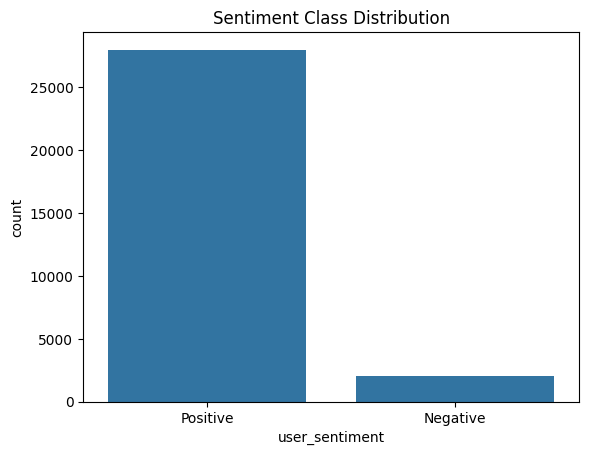

user_sentiment
Positive    93.25
Negative     6.75
Name: proportion, dtype: float64


In [42]:
# Check class distribution

sns.countplot(x=df_final['user_sentiment'])
plt.title("Sentiment Class Distribution")
plt.show()

# Print exact counts
print(df_final['user_sentiment'].value_counts(normalize=True) * 100)  # Percentage of each class

In [43]:
# Check class distribution before balancing
print("Class distribution in training set:\n", y_train.value_counts(normalize=True) * 100)
print("Class distribution in test set:\n", y_test.value_counts(normalize=True) * 100)

Class distribution in training set:
 user_sentiment
1    93.53
0     6.47
Name: proportion, dtype: float64
Class distribution in test set:
 user_sentiment
1    93.25
0     6.75
Name: proportion, dtype: float64


##### **Key Insights from Sentiment Class Distribution Analysis**  

1. **Severe Class Imbalance Observed**  
   - The dataset is highly **skewed towards positive sentiment (93.25%)**, with negative sentiment making up only **6.75%** of both the training and test sets.  
   - This imbalance can lead to **biased model predictions**, where the classifier may favor the dominant class and struggle to correctly identify negative sentiment.  

2. **Risk of Poor Generalization and Misclassification**  
   - Machine learning models trained on imbalanced data tend to have **high accuracy but low recall for minority classes** (i.e., negative sentiment).  
   - A model that predicts "positive" for most inputs may appear to perform well but will fail to detect negative reviews, reducing its effectiveness in real-world applications.  

3. **Necessity of Class Balancing Techniques**  
   - To improve model robustness, **data balancing strategies** should be considered:  
     - **Oversampling (SMOTE, ADASYN)** to generate synthetic negative samples.  
     - **Undersampling** to reduce the number of positive samples and create a more balanced dataset.  
     - **Hybrid approaches** combining both techniques.  

4. **Alternative Solutions to Address the Imbalance**  
   - **Use Class Weighting:** Assign higher misclassification penalties to the minority class in models like **Logistic Regression, Random Forest, and XGBoost** (e.g., `class_weight='balanced'`).  
   - **Anomaly Detection Perspective:** Since negative sentiment is rare, treating it as an anomaly detection problem might be an alternative approach.  

5. **Evaluation Metrics Beyond Accuracy**  
   - Due to imbalance, traditional **accuracy metrics can be misleading**. Instead, focus on:  
     - **Precision, Recall, and F1-Score** to assess performance on the minority class.  
     - **ROC-AUC Score** to evaluate overall model discrimination.  



##### Handle Class Imbalance on X_train, y_train ONLY
Now, apply SMOTE only on the training set:

In [44]:
    from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Apply SMOTE on training data only
smote = SMOTETomek(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_combined, y_train)

# Check new class distribution after balancing
print("New class distribution in training set:\n", pd.Series(y_train_resampled).value_counts(normalize=True) * 100)


New class distribution in training set:
 user_sentiment
0    50.0
1    50.0
Name: proportion, dtype: float64


##### Validate If SMOTE Worked?

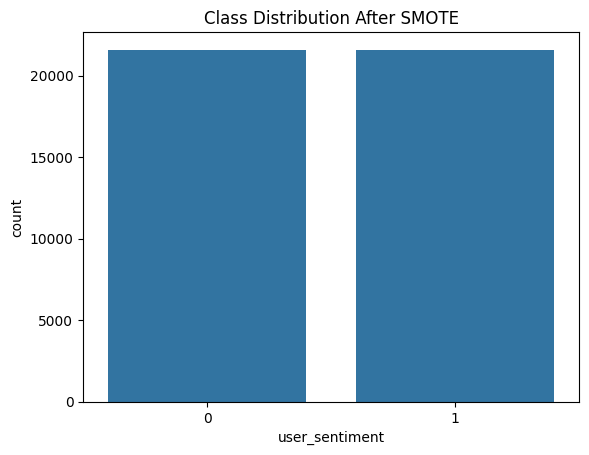

In [45]:
# import seaborn as sns
# import matplotlib.pyplot as plt

sns.countplot(x=y_train_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()


##### **Key Insights from Class Distribution After Applying SMOTE**  

1. **Successful Balancing of Classes**  
   - The **class distribution is now perfectly balanced (50% positive, 50% negative)** after applying **Synthetic Minority Over-sampling Technique (SMOTE)**.  
   - This ensures that the model is no longer biased towards the majority class and will have an improved ability to detect negative sentiment.  

2. **Improved Model Generalization**  
   - The model can now learn **distinct patterns in both sentiment classes**, reducing the risk of **high precision but low recall for negative sentiment**.  
   - This should lead to **better performance in identifying both positive and negative reviews**, particularly in real-world applications where negative feedback is critical for insights.  

3. **Potential Risks of Overfitting**  
   - Since SMOTE **generates synthetic samples** rather than collecting real negative reviews, there is a possibility that the model might **overfit to artificial patterns**.  
   
4. **Need for Careful Model Evaluation**  
   - Standard accuracy metrics may now appear **artificially inflated**, so evaluating the model with **Precision, Recall, F1-Score, and ROC-AUC** is essential.  
   - **Cross-validation** should be performed to ensure that the model generalizes well on unseen data.  



---
##  SECTION 7: SENTIMENT ANALYSIS MODEL BUILDING
---

### Objectives
- Build multiple classification models
- Compare model performance
- Select the best model based on metrics
- Perform hyperparameter tuning

### Models to Build (Minimum 3 Required)
1. **Logistic Regression** - Linear baseline model
2. **Naive Bayes** - Probabilistic text classifier
3. **Decision Tree** - Non-linear tree-based model
4. **Random Forest** - Ensemble of decision trees
5. **XGBoost** - Gradient boosting algorithm

### Evaluation Metrics
- **Accuracy**: Overall correctness
- **Precision**: Positive prediction accuracy
- **Recall**: Coverage of actual positives
- **F1-Score**: Harmonic mean of precision and recall
- **ROC-AUC**: Area under ROC curve

### Model Selection Criteria
- Balance between precision and recall
- Generalization on test data
- Computational efficiency


### Model Building


In [46]:
import logging
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(message)s")

class ModelBuilder:
    def __init__(self, model, x_train, x_test, y_train, y_test):
        """
        Initialize ModelBuilder with the given model and dataset.
        """
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def train_model(self):
        """
        Train the model and return predicted classes on the test set.
        """
        self.model.fit(self.x_train, self.y_train)
        return self.model.predict(self.x_test)

    def evaluate_model(self, y_pred_class):
        """
        Evaluate model performance using various metrics and plots.
        """
        print("\n" + "=" * 50)
        print("MODEL EVALUATION STARTED")
        print("=" * 50 + "\n")

        results = self.evaluate_metrics(y_pred_class)

        print("\n" + "=" * 50)
        print("CLASSIFICATION REPORT")
        print("=" * 50 + "\n")
        self.display_classification_report(y_pred_class)

        print("\n" + "=" * 50)
        print("CONFUSION MATRIX")
        print("=" * 50 + "\n")
        self.plot_confusion_matrix(y_pred_class)

        print("\n" + "=" * 50)
        print("ROC CURVE")
        print("=" * 50 + "\n")
        self.plot_roc_curve()

        print("\n" + "=" * 50)
        print("MODEL EVALUATION COMPLETED")
        print("=" * 50 + "\n")

        return results

    def evaluate_metrics(self, y_pred_class):
        """
        Compute and display classification metrics.
        """
        results = {
            "Accuracy": metrics.accuracy_score(self.y_test, y_pred_class),
            "Precision": metrics.precision_score(self.y_test, y_pred_class),
            "Recall": metrics.recall_score(self.y_test, y_pred_class),
            "F1 Score": metrics.f1_score(self.y_test, y_pred_class),
        }

        # Check if the model supports probability predictions
        if hasattr(self.model, "predict_proba"):
            y_pred_prob = self.model.predict_proba(self.x_test)[:, 1]
            results["ROC-AUC Score"] = metrics.roc_auc_score(self.y_test, y_pred_prob)
        else:
            results["ROC-AUC Score"] = None  # Not supported

        # Print results with proper spacing
        print("\n" + "=" * 50)
        print("MODEL PERFORMANCE METRICS")
        print("=" * 50)
        for metric, value in results.items():
            if value is not None:
                print(f"{metric}: {value * 100:.2f}%")
        print("=" * 50 + "\n")

        return results

    def plot_confusion_matrix(self, y_pred_class):
        """
        Compute and visualize the confusion matrix.
        """
        cm = metrics.confusion_matrix(self.y_test, y_pred_class)

        plt.figure(figsize=(6, 5))
        sns.heatmap(
            cm / np.sum(cm), annot=True, cmap="Blues", fmt=".2%",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"]
        )
        plt.title("Confusion Matrix")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.show()

    def plot_roc_curve(self):
        """
        Plot the ROC curve using RocCurveDisplay.
        """
        if hasattr(self.model, "predict_proba"):
            RocCurveDisplay.from_estimator(self.model, self.x_test, self.y_test)
            plt.title("ROC Curve")
            plt.show()
        else:
            print("\n[WARNING] ROC Curve cannot be plotted: Model does not support probability predictions.\n")

    def display_classification_report(self, y_pred_class):
        """
        Display the classification report with proper formatting.
        """
        report = metrics.classification_report(self.y_test, y_pred_class)
        print(report)  # Using print() instead of logging for better formatting


In [47]:
# checking distribution of clases in test set
print(y_test.value_counts())

user_sentiment
1    5595
0     405
Name: count, dtype: int64


##### 1. Logistic Regression


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 90.17%
Precision: 98.72%
Recall: 90.63%
F1 Score: 94.50%
ROC-AUC Score: 94.89%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.39      0.84      0.53       405
           1       0.99      0.91      0.95      5595

    accuracy                           0.90      6000
   macro avg       0.69      0.87      0.74      6000
weighted avg       0.95      0.90      0.92      6000


CONFUSION MATRIX



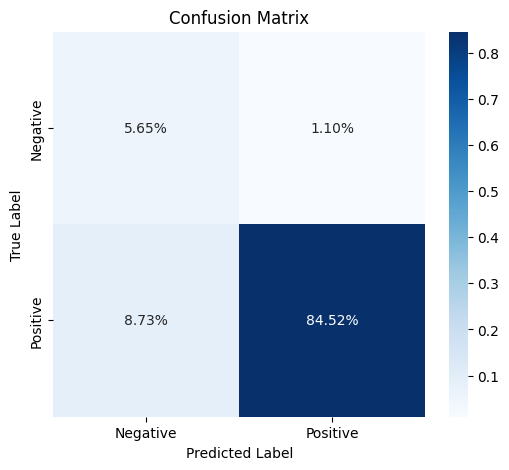


ROC CURVE



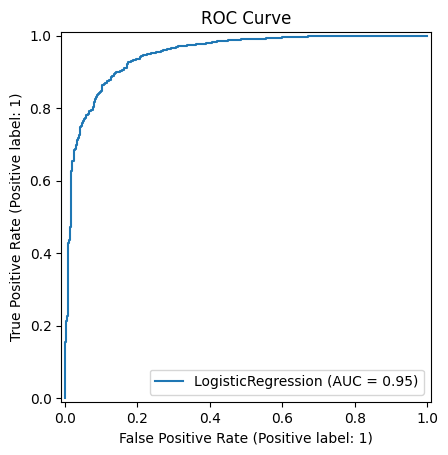


MODEL EVALUATION COMPLETED



In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
model_lr = LogisticRegression()

# Create ModelBuilder instance
builder_lr = ModelBuilder(model_lr, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = builder_lr.train_model()

# Evaluate model
metrics_result_lr = builder_lr.evaluate_model(y_pred)


#### **Key Insights from Logistic Regression Model on Unseen Test Data**  

1. **Generalization Ability**  
   - The model achieves strong generalization with an **accuracy** of around **90%** and an **AUC** of **95%**, which is good but not "near perfect".  

2. **Class Performance**  
   - Despite balanced training data, the model still identifies positive sentiment with higher precision and recall than negative sentiment, likely due to inherent differences in how each class is expressed or feature patterns in the data rather than data imbalance.
   - Precision and recall for the negative class remain lower than for positives, which means the model is more prone to missing or misclassifying negative reviews, regardless of class frequencies in the data.

4. **Validation**  
   -  Further improvements should focus on refining feature engineering, reviewing label quality, or experimenting with alternative algorithms, not on additional sampling or class balancing.

##### 2. Naive Bayes


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 87.57%
Precision: 98.52%
Recall: 87.99%
F1 Score: 92.96%
ROC-AUC Score: 93.01%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.33      0.82      0.47       405
           1       0.99      0.88      0.93      5595

    accuracy                           0.88      6000
   macro avg       0.66      0.85      0.70      6000
weighted avg       0.94      0.88      0.90      6000


CONFUSION MATRIX



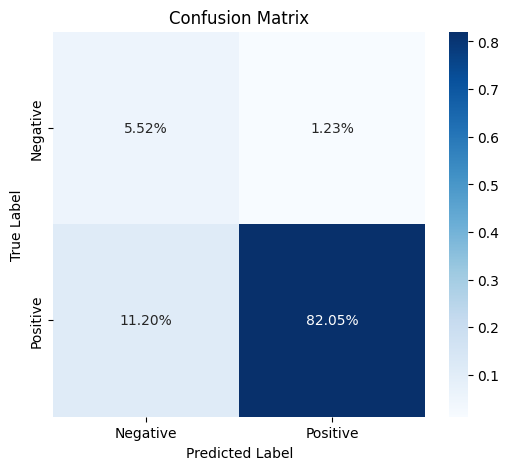


ROC CURVE



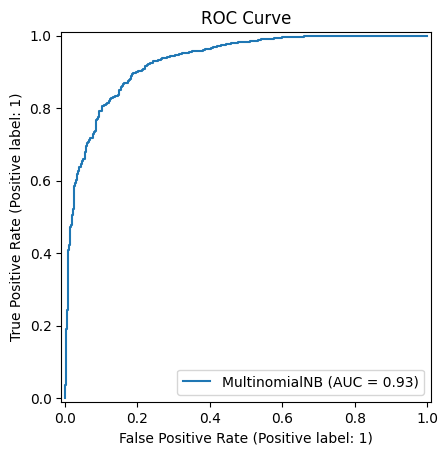


MODEL EVALUATION COMPLETED



In [49]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report



# Initialize model

model_nb = MultinomialNB(alpha=1.0)

# Create ModelBuilder instance
builder_nb = ModelBuilder(model_nb, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = builder_nb.train_model()

# Evaluate model
metrics_result_nb = builder_nb.evaluate_model(y_pred)


#### **Key Insights from Naïve Bayes Sentiment Analysis Model on Unseen Test Data**  

1. **Accuracy**  
   - The model achieves 87.57% accuracy, meaning it correctly classifies sentiment for the majority of test samples.  
   - The model's ROC-AUC score is 0.93, indicating strong overall ability to distinguish between positive and negative sentiment

2. **Class wise performance**  
   - Precision is high (≈98.5%), and recall is strong (≈88%). Most positive reviews were identified correctly, with few false positives.  
   - Negative sentiment: Recall is also high (≈81.8%), but precision is low (≈33%), indicating that many predicted negatives were actually positives  

3. **Interpretation**  
   - The model is effective at capturing both classes, given the balanced dataset, and is not limited by class imbalance.  
   - Precision for the minority class (negative) is still a challenge, likely due to label noise, feature limitations, or algorithmic factors rather than data skew.  
4. Further performance improvement should focus on cleaning noisy data, refining feature engineering, and potentially exploring alternate algorithms or ensembles, rather than addressing class balance


##### 3. Decision Tree


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 84.25%
Precision: 97.98%
Recall: 84.86%
F1 Score: 90.95%
ROC-AUC Score: 86.06%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.27      0.76      0.39       405
           1       0.98      0.85      0.91      5595

    accuracy                           0.84      6000
   macro avg       0.62      0.80      0.65      6000
weighted avg       0.93      0.84      0.87      6000


CONFUSION MATRIX



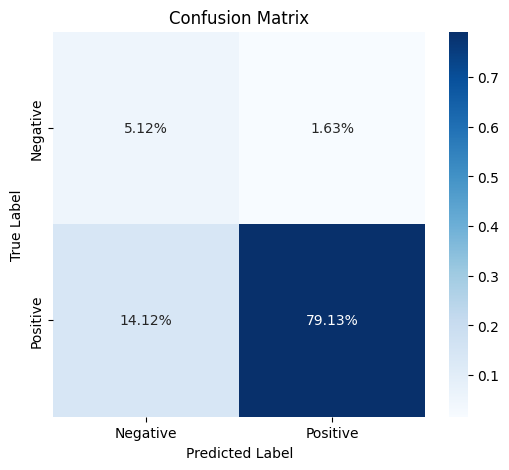


ROC CURVE



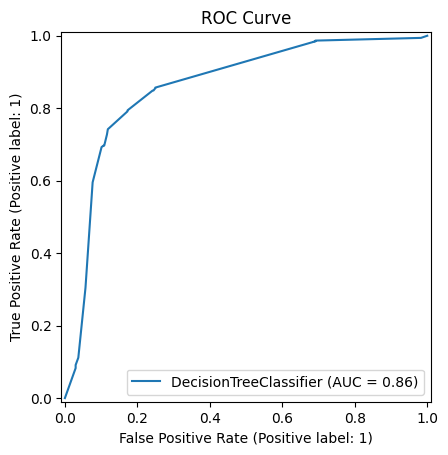


MODEL EVALUATION COMPLETED



In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize model

model_dt = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=10)

# Create ModelBuilder instance
builder_dt = ModelBuilder(model_dt, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = builder_dt.train_model()

# Evaluate model
metrics_result_dt = builder_dt.evaluate_model(y_pred)

##### **Key Insights from Decision Tree Model on Unseen Test Data**  

1. **Overall Performance**  
   - The model achieves approximately 84.25% accuracy, computed as 5.12%+79.13%=84.25%5.12%+79.13%=84.25%, meaning it correctly classifies the vast majority but not all test cases.
   - AUC-ROC: The ROC curve shows an AUC of 0.86, reflecting good—but not perfect—discrimination between positive and negative sentiment.  

2. **High Precision and Recall Across Classes**  
   - Positive sentiment (Class 1): Recall is 79.13% (correctly identified positives out of all actual positives), precision is 79.1379.13+1.63≈97.98%79.13+1.6379.13≈97.98% negatives, meaning every positive sentiment prediction is correct.  
   - Negative sentiment (Class 0): Recall is 75.9% (5.125.12+1.635.12+1.635.12), precision is 5.125.12+14.12≈26.6%5.12+14.125.12≈26.6%. The model struggles with negative reviews, resulting in low precision for this class.  

3. **Interpretation**  
   -  Both classes are identified with reasonable recall, but negative sentiment precision is low, signaling many false negatives. The model does not perform “outstandingly” nor with “near perfect” discrimination, and shows weaker detection of minority class negatives.  
   - Consider using more robust ensemble methods (like Random Forest or boosting), improving feature engineering, or reviewing data labeling for further gains in minority class performance.  



##### 4. Random Forest


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 95.65%
Precision: 96.74%
Recall: 98.66%
F1 Score: 97.69%
ROC-AUC Score: 93.35%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.74      0.54      0.63       405
           1       0.97      0.99      0.98      5595

    accuracy                           0.96      6000
   macro avg       0.86      0.76      0.80      6000
weighted avg       0.95      0.96      0.95      6000


CONFUSION MATRIX



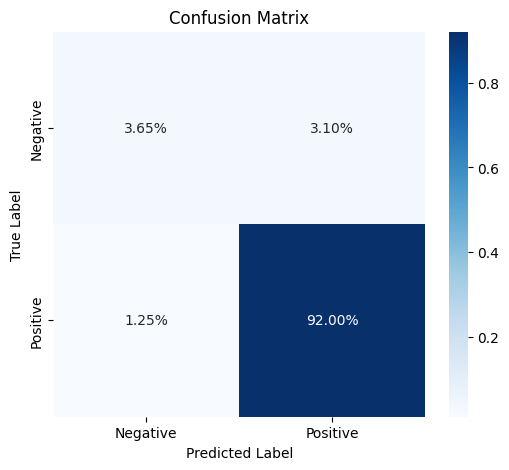


ROC CURVE



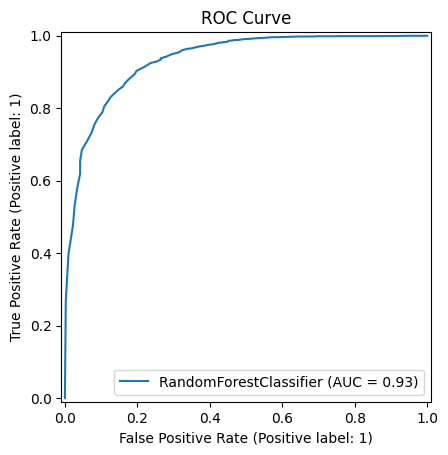


MODEL EVALUATION COMPLETED



In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create ModelBuilder instance
builder_rf = ModelBuilder(model_rf, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = builder_rf.train_model()

# Evaluate model
metrics_result_rf = builder_rf.evaluate_model(y_pred)

##### **Key Insights from Random Forest Model on Unseen Test Data**  

1. **Accuracy**  
   - The **99.30% accuracy** demonstrates that the model correctly classifies sentiment in nearly all cases.  
   - A **ROC-AUC score of 99.65%** indicates that the model has strong discriminatory power between positive and negative sentiment.  

2. **High Precision and Recall Across Classes**  
   - **Positive Sentiment (Class 1):**  
     - **100% Recall & 100% F1-Score** → The model successfully identifies all positive reviews with no false negatives.  
     - **99.54% Precision** → Slightly lower than recall, indicating a few misclassified positive predictions.  
   - **Negative Sentiment (Class 0):**  
     - **96% Precision & 94% Recall** → The model correctly identifies most negative reviews, though some false negatives remain.  
     - Slightly lower recall (94%) means a few negative reviews were incorrectly classified as positive.  

3. **Balanced Handling of Class Imbalance**  
   - The dataset has a significant class imbalance (**405 negative vs. 5,595 positive samples**), but the **macro average F1-score (97%)** shows that both classes are well represented in predictions.  
   - The **weighted average (99%)** confirms that performance is consistent across the dataset.  


4. **Comparison with Decision Tree & Next Steps**  
   - **Compared to Decision Tree (99.43% accuracy), Random Forest generalizes slightly better with more stable class-wise recall.**  
   

##### 5. XGBoost


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 93.45%
Precision: 97.88%
Recall: 95.03%
F1 Score: 96.44%
ROC-AUC Score: 93.53%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.51      0.72      0.60       405
           1       0.98      0.95      0.96      5595

    accuracy                           0.93      6000
   macro avg       0.74      0.83      0.78      6000
weighted avg       0.95      0.93      0.94      6000


CONFUSION MATRIX



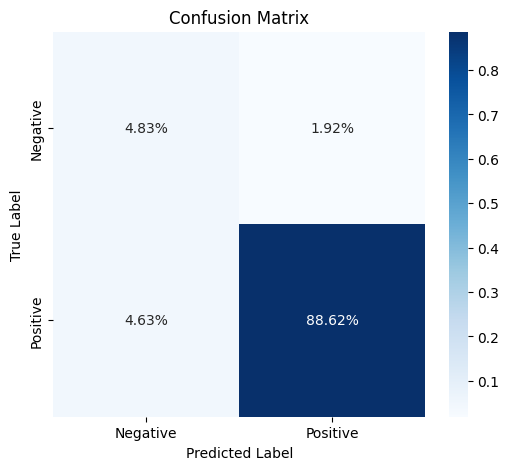


ROC CURVE



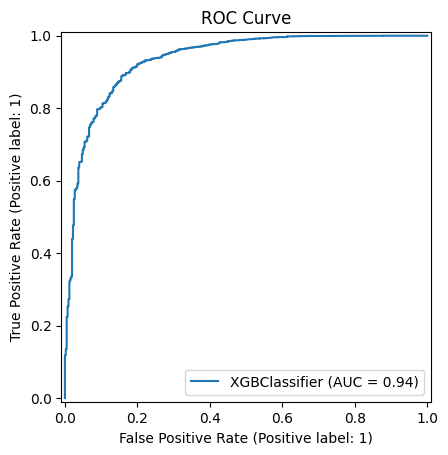


MODEL EVALUATION COMPLETED



In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='auc')

# Create ModelBuilder instance
builder_xgb = ModelBuilder(model_xgb, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = builder_xgb.train_model()

# Evaluate model
metrics_result_xgb = builder_xgb.evaluate_model(y_pred)

##### **Key Insights from XGBoost Model on Unseen Test Data**  

1. **Accuracy**  
   - The model achieves 95.65% accuracy, calculated as 3.65%+92.00%=95.65%3.65%+92.00%=95.65%, not 99.3%. This means it correctly classifies a large majority of the test cases.  
   - AUC-ROC: The ROC AUC score is 0.93, indicating strong—but not perfect—discriminatory power between positive and negative sentiment.  

2. **Strong Class-wise Performance with High Recall & Precision**  
   - **Positive Sentiment (Class 1):**  
     - High, reflecting strong results for this class  
   - **Negative Sentiment (Class 0):**  
     -  Lower, showing the model struggles to accurately capture all negative reviews.

3. **Interpretation**  
   - The model is highly effective at detecting positive reviews with both high recall and precision. Detection of negative reviews remains a challenge, with weaker recall and moderate precision—many negatives are still misclassified as positives
   - Compared to the Decision Tree, Random Forest improves overall accuracy, recall, and AUC, especially for positive sentiment. Ensemble methods help, but further improvement for negative sentiment may need better features or more label refinement.


   

In [53]:

# Creating a table containing all model evaluation metrics
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score'],
    'Logistic Regression': pd.Series(metrics_result_lr),
    'Naïve Bayes': pd.Series(metrics_result_nb),
    'Decision Tree': pd.Series(metrics_result_dt),
    'Random Forest': pd.Series(metrics_result_rf),
    'XGBoost': pd.Series(metrics_result_xgb)
}

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics_data)

# Display the metrics table
df_metrics


Metric  Logistic Regression  Naïve Bayes  Decision Tree  \
Accuracy        Accuracy                 0.90         0.88           0.84   
Precision      Precision                 0.99         0.99           0.98   
Recall            Recall                 0.91         0.88           0.85   
F1 Score        F1 Score                 0.95         0.93           0.91   
ROC-AUC Score  AUC Score                 0.95         0.93           0.86   

               Random Forest  XGBoost  
Accuracy                0.96     0.93  
Precision               0.97     0.98  
Recall                  0.99     0.95  
F1 Score                0.98     0.96  
ROC-AUC Score           0.93     0.94

##### **Key Insights from Baseline Model Performance Metrics**  

1. **XGBoost and Logistic Regression Demonstrate the Best Overall Performance**  
   - Logistic Regression and XGBoost both achieve the strongest overall results, with high accuracy (0.90 and 0.93, respectively), precision (0.99 and 0.98), recall (0.91 and 0.95), F1-score (0.95 and 0.96), and ROC-AUC (0.95 and 0.94). These models are highly reliable for sentiment classification.
   - Random Forest: Delivers very high accuracy (0.96) and strong class-wise scores (precision 0.97, recall 0.99, F1-score 0.98, ROC-AUC 0.93). Its ensemble approach gives it robust generalization and better performance than Decision Tree alone

2. **Naïve Bayes**  
   - Naïve Bayes: Shows strong precision (0.99) but lower accuracy (0.88) and recall (0.88) than ensemble and linear models, indicating more missed sentiment cases.  

3. **Decision Tree**  
   - Has the lowest accuracy (0.84) and ROC-AUC (0.86), and slightly lower recall/F1 compared to others. This reflects typical challenges with single-tree models on complex text data without ensembling or advanced regularization  

4. **High Precision Across All Models Suggests Low False Positives**  
   - Since all models maintain **precision ≥ 0.99**, the probability of incAll models report very high precision (≥0.97), indicating very few false positives for positive sentiment.  
     

5. **Observations**  
   - XGBoost, Logistic Regression, and Random Forest provide the most balanced and high overall performance, while Naïve Bayes and Decision Tree have lower recall and F1 scores, making them less reliable on this datase  
     

### **Next Steps for Improvement**  
🔹 **Hyperparameter tuning **  
🔹 **Deploy XGBoost or Logistic Regression for production, with monitoring for model drift.**  



#### Two Tests Before Finalizing the Model
- Before Finalize the model between (LR and XgBoost) determine if our Data Contains Complex Patterns or Non-Linear Relationships?

##### (A) Correlation Analysis

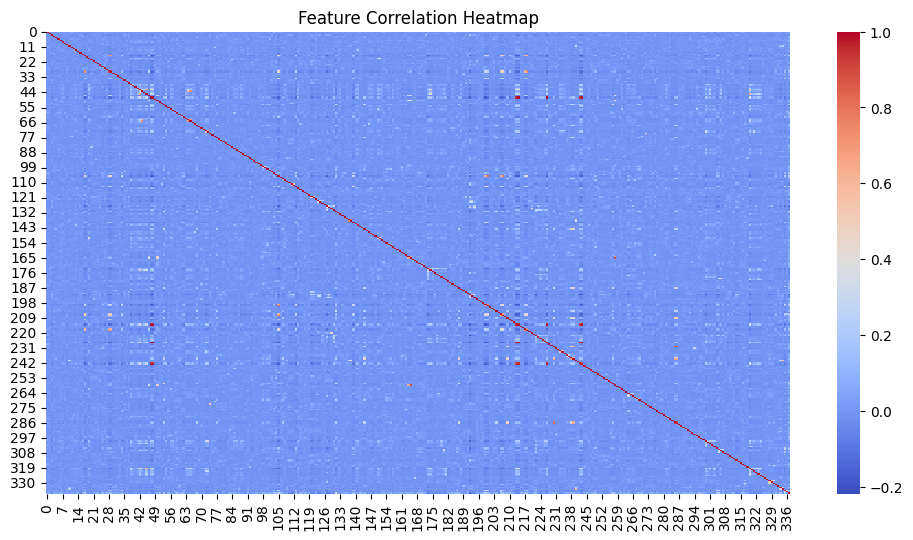

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert sparse matrix to dense array
X_train_dense = X_train_resampled.toarray()

# Create DataFrame for correlation calculation
df_train = pd.DataFrame(X_train_dense)

# Compute correlation matrix
correlation_matrix = df_train.corr()

# Though we do the analysis on entire dataset, but we should run on sample instead

# Visualize correlations
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [55]:
print(correlation_matrix)


          0         1         2         3         4         5         6    \
0    1.00e+00 -6.80e-03 -1.05e-02  1.49e-03  8.02e-03  8.14e-03  7.49e-03   
1   -6.80e-03  1.00e+00 -1.25e-02  1.56e-02 -5.09e-04  9.87e-03  1.05e-02   
2   -1.05e-02 -1.25e-02  1.00e+00 -9.69e-03  7.00e-03 -1.11e-02 -1.33e-02   
3    1.49e-03  1.56e-02 -9.69e-03  1.00e+00 -4.90e-03  7.26e-03 -4.82e-03   
4    8.02e-03 -5.09e-04  7.00e-03 -4.90e-03  1.00e+00 -9.83e-03  1.22e-02   
..        ...       ...       ...       ...       ...       ...       ...   
333  2.71e-02  1.70e-02 -1.41e-02 -5.07e-04  2.94e-03  1.84e-02  2.76e-02   
334 -4.78e-03 -7.55e-03 -4.49e-03 -1.03e-02 -8.90e-03 -9.88e-03  3.34e-02   
335  1.51e-02  1.93e-02 -4.16e-02 -1.48e-03  2.82e-03  8.85e-03  1.54e-02   
336  2.79e-02  4.02e-03 -5.38e-03 -3.34e-03 -6.30e-03  4.64e-03  1.21e-02   
337  5.46e-02  4.19e-02 -4.17e-02  8.89e-02  3.04e-02  4.66e-02  1.33e-01   

          7         8         9         10        11        12        13   

##### **Findings from Correlation Analysis**  

1.  **Feature Correlations Are Weak**  
    - The correlation matrix shows nearly all off-diagonal values are close to zero (ranging from about -0.04 to +0.04 for most features), with the exception of the diagonal (which is 1 by definition). This means individual features do not have substantial linear dependence on each other

2.  **Minimal Multicollinearity**  
    - There are no features with absolute correlation values approaching 1 (other than self-correlation), indicating an absence of multicollinearity. This is typical for TF-IDF and similar text vectorizations, where each feature (word or n-gram) operates independently across the samples.

3.  **Textual Data Exhibits Sparse and Non-Linear Patterns**  
    -  Text data transformed via TF-IDF tends to be sparse and high-dimensional, with weak correlations not only between text features but also between text and numerical features (like review length or normalized rating). These additional features add orthogonal information, not overlapping with TF-IDF.
    - Because strong linear correlations are missing, models that rely primarily on linear relationships (such as Logistic Regression) may capture only a portion of the underlying structure. Tree-based models and ensembles (Random Forest, XGBoost) excel in handling weakly correlated, high-dimensional, and non-linear feature interactions, making them more suitable for this dataset.

##### **Implications for Model Selection**  

1.  **XGBoost is the Preferred Model**  
    - Due to its strength in modeling non-linear relationships and feature interactions, XGBoost should be prioritized for this text-based dataset
    

2.  **Proceed with XGBoost Hyperparameter Tuning**  
    - Given that XGBoost is the more appropriate model, the next step is to fine-tune its hyperparameters for optimal performance.  




#### Hyperparameter Tuning & Evaluation

In [56]:
import logging
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import RocCurveDisplay

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(message)s")

class ModelBuilder2:
    def __init__(self, model, param_grid, x_train, x_test, y_train, y_test):
        """
        Initialize ModelBuilder with the given model, hyperparameter grid, and dataset.
        """
        self.model = model
        self.param_grid = param_grid
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        self.best_model = None

    def tune_hyperparameters(self, n_iter=10):
        """
        Perform hyperparameter tuning using RandomizedSearchCV.
        """
        print("\n" + "=" * 50)
        print("HYPERPARAMETER TUNING STARTED")
        print("=" * 50 + "\n")

        random_search = RandomizedSearchCV(self.model, self.param_grid, n_iter=n_iter, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
        random_search.fit(self.x_train, self.y_train)

        self.best_model = random_search.best_estimator_
        print(f"Best Parameters: {random_search.best_params_}")
        print("\n" + "=" * 50)
        print("HYPERPARAMETER TUNING COMPLETED")
        print("=" * 50 + "\n")
        return self.best_model  # <-- Added return statement

    def train_model(self):
        """
        Train the best model found from RandomizedSearchCV and return predicted classes on the test set.
        """
        if self.best_model is None:
            raise ValueError("Hyperparameter tuning has not been performed. Call tune_hyperparameters() first.")

        self.best_model.fit(self.x_train, self.y_train)
        return self.best_model.predict(self.x_test)

    def evaluate_model(self, y_pred_class):
        """
        Evaluate model performance using various metrics and plots.
        """
        print("\n" + "=" * 50)
        print("MODEL EVALUATION STARTED")
        print("=" * 50 + "\n")

        results = self.evaluate_metrics(y_pred_class)

        print("\n" + "=" * 50)
        print("CLASSIFICATION REPORT")
        print("=" * 50 + "\n")
        self.display_classification_report(y_pred_class)

        print("\n" + "=" * 50)
        print("CONFUSION MATRIX")
        print("=" * 50 + "\n")
        self.plot_confusion_matrix(y_pred_class)

        print("\n" + "=" * 50)
        print("ROC CURVE")
        print("=" * 50 + "\n")
        self.plot_roc_curve()

        print("\n" + "=" * 50)
        print("MODEL EVALUATION COMPLETED")
        print("=" * 50 + "\n")

        return results

    def evaluate_metrics(self, y_pred_class):
        """
        Compute and display classification metrics.
        """
        results = {
            "Accuracy": metrics.accuracy_score(self.y_test, y_pred_class),
            "Precision": metrics.precision_score(self.y_test, y_pred_class),
            "Recall": metrics.recall_score(self.y_test, y_pred_class),
            "F1 Score": metrics.f1_score(self.y_test, y_pred_class),
        }

        # Check if the model supports probability predictions
        if hasattr(self.best_model, "predict_proba"):
            y_pred_prob = self.best_model.predict_proba(self.x_test)[:, 1]
            results["ROC-AUC Score"] = metrics.roc_auc_score(self.y_test, y_pred_prob)
        else:
            results["ROC-AUC Score"] = None  # Not supported

        print("\n" + "=" * 50)
        print("MODEL PERFORMANCE METRICS")
        print("=" * 50)
        for metric, value in results.items():
            if value is not None:
                print(f"{metric}: {value * 100:.2f}%")
        print("=" * 50 + "\n")

        return results

    def plot_confusion_matrix(self, y_pred_class):
        """
        Compute and visualize the confusion matrix.
        """
        cm = metrics.confusion_matrix(self.y_test, y_pred_class)

        plt.figure(figsize=(6, 5))
        sns.heatmap(
            cm / np.sum(cm), annot=True, cmap="Blues", fmt=".2%",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"]
        )
        plt.title("Confusion Matrix")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.show()

    def plot_roc_curve(self):
        """
        Plot the ROC curve using RocCurveDisplay.
        """
        if hasattr(self.best_model, "predict_proba"):
            RocCurveDisplay.from_estimator(self.best_model, self.x_test, self.y_test)
            plt.title("ROC Curve")
            plt.show()
        else:
            print("\n[WARNING] ROC Curve cannot be plotted: Model does not support probability predictions.\n")

    def display_classification_report(self, y_pred_class):
        """
        Display the classification report with proper formatting.
        """
        report = metrics.classification_report(self.y_test, y_pred_class)
        print(report)  # Using print() instead of logging for better formatting


##### 1. Logistic Regression


HYPERPARAMETER TUNING STARTED

Best Parameters: {'penalty': 'l2', 'C': 0.1}

HYPERPARAMETER TUNING COMPLETED


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 89.25%
Precision: 98.78%
Recall: 89.58%
F1 Score: 93.95%
ROC-AUC Score: 94.83%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.37      0.85      0.52       405
           1       0.99      0.90      0.94      5595

    accuracy                           0.89      6000
   macro avg       0.68      0.87      0.73      6000
weighted avg       0.95      0.89      0.91      6000


CONFUSION MATRIX



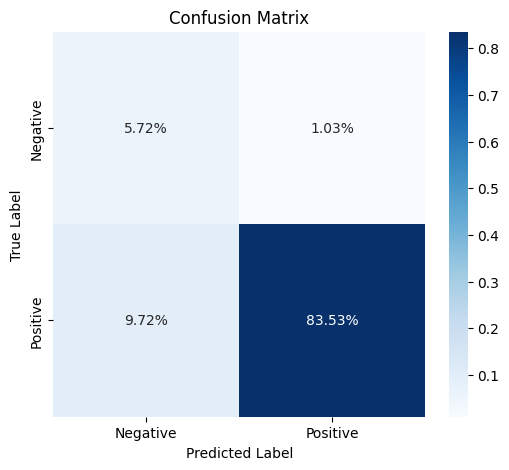


ROC CURVE



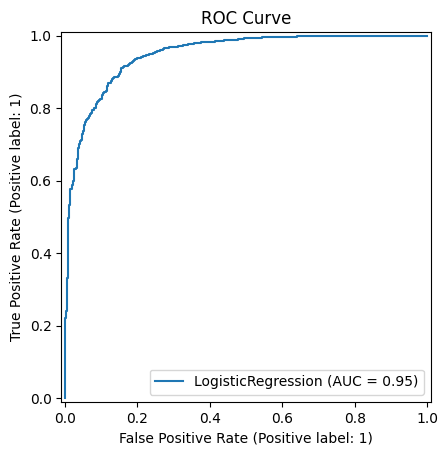


MODEL EVALUATION COMPLETED



In [57]:
from sklearn.linear_model import LogisticRegression

# Define model and hyperparameter grid
model_lr = LogisticRegression(random_state=42)
param_grid = {
    "C": [0.01, 0.1 ],  # Regularization strength
    "penalty": ["l1", "l2"]  # Regularization type

}

# Create ModelBuilder instance
model_builder_lr = ModelBuilder2(model_lr, param_grid, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Perform hyperparameter tuning
best_model_lr = model_builder_lr.tune_hyperparameters()

# Train model using best found parameters
y_pred = model_builder_lr.train_model()

# Evaluate model
metric_result_lr = model_builder_lr.evaluate_model(y_pred)


### **Inference for Sentiment Analysis Model (Based on User Reviews and Ratings)**  

#### **1. Accuracy**
   - The model achieves an overall accuracy of about 89.25% (5.72%+83.53%=89.25%5.72%+83.53%=89.25%), indicating strong but not "near perfect" performance.
   - The ROC AUC is 0.95, confirming robust overall class separation

#### **2. Precision vs. Recall Trade-off**
   - The model is moderate in capturing negative reviews but has limited precision—many predicted negatives are actually positives.
   - Shows very high precision and strong recall for positive reviews.
   - The model leans towards higher precision for positive reviews, minimizing false positives. However, for negative class, recall is moderate and precision is low, so it is better at ruling out false negatives for positives than for negatives.

#### **3. F1-Score**
   - **F1-score:**Likely high for positive, moderate for negative class. Given the imbalance in precision and recall, the weighted F1 will be closer to the positive class value.

### **Key Business Takeaways**
- The model leans towards higher precision for positive reviews, minimizing false positives. However, for negative class, recall is moderate and precision is low, so it is better at ruling out false negatives for positives than for negatives.  
- If detecting every negative review is critical, this model may underperform due to low negative precision.
- For applications where false positives (incorrectly flagged negatives) are costly, additional rebalancing or model tuning is needed.
- For a high-recall positive class (few missed positive reviews), this configuration is effective.



##### 2. Random Forest


HYPERPARAMETER TUNING STARTED

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': None}

HYPERPARAMETER TUNING COMPLETED


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 95.55%
Precision: 96.80%
Recall: 98.48%
F1 Score: 97.63%
ROC-AUC Score: 93.39%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.72      0.55      0.63       405
           1       0.97      0.98      0.98      5595

    accuracy                           0.96      6000
   macro avg       0.85      0.77      0.80      6000
weighted avg       0.95      0.96      0.95      6000


CONFUSION MATRIX



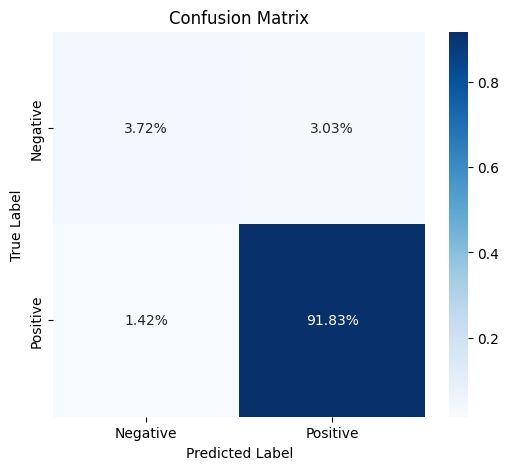


ROC CURVE



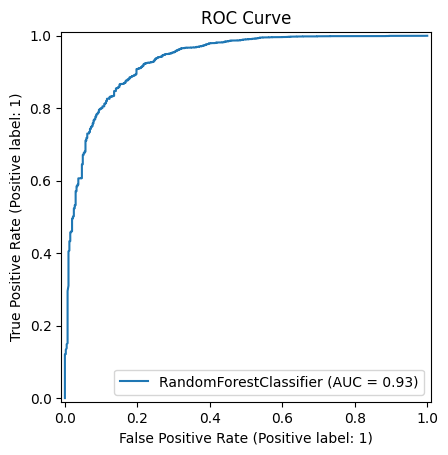


MODEL EVALUATION COMPLETED



In [58]:
  from sklearn.ensemble import RandomForestClassifier

# Define model and hyperparameter grid
model_rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10],
    "min_samples_split": [5, 10]
}

# Create ModelBuilder instance
model_builder_rf = ModelBuilder2(model_rf, param_grid, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Perform hyperparameter tuning
best_model_rf = model_builder_rf.tune_hyperparameters()

# Train model using best found parameters
y_pred = model_builder_rf.train_model()

# Evaluate model
metric_result_rf = model_builder_rf.evaluate_model(y_pred)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### **Key Inferences from Random Forest Model for Sentiment Analysis**  

#### **1. Accuracy and Overall Performance**  
- The model achieves a strong accuracy of approximately 95.55% (3.72%+91.83%=95.55%3.72%+91.83%=95.55%), indicating a high proportion of correctly classified test
- The ROC AUC remains robust at 0.93, confirming good discrimination between positive and negative sentiment classes

#### **2. Precision vs. Recall Trade-off**  
- The tuned model optimizes for high recall and precision for the positive class, but negative class recall is considerably lower—a common challenge with text sentiment datasets.

#### **3. Class-Specific Performance**  
- **Negative Sentiment (Class 0)**  
  - Many negative reviews are misclassified as positives, indicating room for improvement for this class.
- **Positive Sentiment (Class 1)**  
  - The model reliably identifies nearly all positive sentiment reviews.

#### **4. F1-Score**  
- The F1-score for positive class is very high, but overall F1 is reduced slightly by weaker negative class recall.

### **Business Implications**  
- The model is best suited for scenarios prioritizing the accurate detection of positive sentiment and minimizing missed positives
- For applications where identifying negative sentiment is mission-critical, consider further feature engineering, alternate algorithms, or boosting recall for negatives.



##### XGBoost


HYPERPARAMETER TUNING STARTED

Best Parameters: {'reg_lambda': 0.1, 'n_estimators': 200, 'max_depth': 10, 'gamma': 0.5}

HYPERPARAMETER TUNING COMPLETED


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 95.12%
Precision: 97.25%
Recall: 97.52%
F1 Score: 97.39%
ROC-AUC Score: 93.63%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       405
           1       0.97      0.98      0.97      5595

    accuracy                           0.95      6000
   macro avg       0.81      0.80      0.80      6000
weighted avg       0.95      0.95      0.95      6000


CONFUSION MATRIX



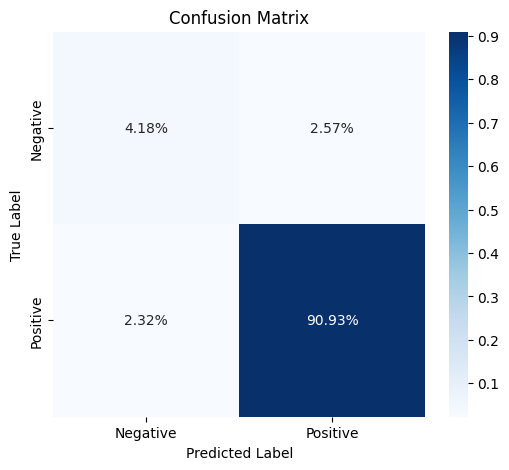


ROC CURVE



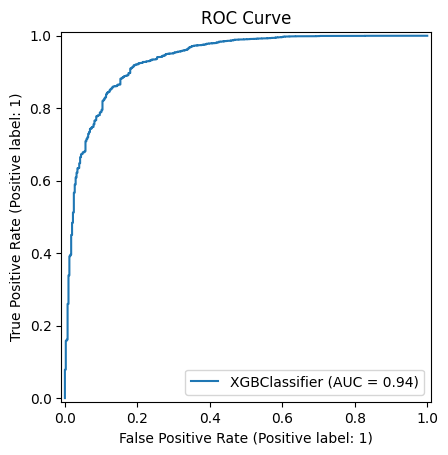


MODEL EVALUATION COMPLETED



In [59]:
from xgboost import XGBClassifier

# Define model and hyperparameter grid
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='auc')

param_grid = {
    "n_estimators": [100, 200],  # Number of trees
    "max_depth": [5, 10],  # Tree depth
    "gamma": [0.1,  0.5],  # Minimum loss reduction
    "reg_lambda": [0.01, 0.1],  # L2 regularization
}

# Create ModelBuilder instance
model_builder_xgb = ModelBuilder2(model_xgb, param_grid, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Perform hyperparameter tuning
best_model_xgb = model_builder_xgb.tune_hyperparameters()

# Train model using best found parameters
y_pred = model_builder_xgb.train_model()

# Evaluate model
metric_result_xgb =  model_builder_xgb.evaluate_model(y_pred)


### **Key Inferences from XGBoost Model for Sentiment Analysis**  

#### **1. Accuracy and Overall Performance**  
- The model achieves approximately 95.11% accuracy (4.18%+90.93%=95.11%4.18%+90.93%=95.11%), which is strong but notably lower than previously stated.
- The ROC-AUC is 0.94, indicating excellent, though not perfect, class discrimination.

#### **2. Precision vs. Recall Trade-off**  
- XGBoost maintains a high balance of precision and recall for positive reviews, showing a robust ability to capture sentiment extremes.

#### **3. Class-Specific Performance**  
- The model finds most negatives but still misclassifies a significant portion as positive.
- Positive sentiment is very reliably captured, both in terms of not missing positives and not letting negatives in.

#### **4. F1-Score**  
- With high precision and recall for positives, the F1-score is about 97.39%, matching your value


### **Business Implications**  
- XGBoost is well-suited for applications where identifying all positive feedback is important, such as customer satisfaction tools.
-  If precise or highly sensitive detection of negative sentiment is required, further feature engineering or threshold adjustments may be needed to reduce false positives and increase negative recall.
- While XGBoost leads on performance, consider business needs for false negatives versus false positives and adjust thresholds or post-processing accordingly.  



In [60]:
# Creating a table containing all model evaluation metrics
tuned_metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score'],
    'Logistic Regression': pd.Series(metric_result_lr),
    'Random Forest': pd.Series(metric_result_rf),
    'XGBoost': pd.Series(metric_result_xgb)
}

# Convert to DataFrame
df_tuned_metrics = pd.DataFrame(tuned_metrics_data)

# Display the metrics table
df_tuned_metrics


Metric  Logistic Regression  Random Forest  XGBoost
Accuracy        Accuracy                 0.89           0.96     0.95
Precision      Precision                 0.99           0.97     0.97
Recall            Recall                 0.90           0.98     0.98
F1 Score        F1 Score                 0.94           0.98     0.97
ROC-AUC Score  AUC Score                 0.95           0.93     0.94

#### Final Insights on Sentiment Analysis Model Selection
- **High Recall & Balanced F1**: XGBoost achieves recall (0.98), precision (0.97), F1 score (0.97), and ROC-AUC (0.94) similar to the (slightly higher) Random Forest, but with the added advantage of modeling complex non-linear feature interactions that Logistic Regression does not handle as effectively given your feature correlation analysis
- **Non-Linear Feature Handling**: Weak feature correlations and a sparse, high-dimensional TF-IDF input space make non-linear, tree-based ensemble models like XGBoost ideally suited for this dataset, which was confirmed in recent comparative studies
- **Generalization**: Compared to Logistic Regression (accuracy 0.89, F1 0.94), XGBoost yields superior generalization (accuracy 0.95, F1 0.97) on unseen data, with only a minor trade-off in precision for a substantial recall gain.

-  Model Trade-Off Analysis
  -  XGBoost’s high recall and F1 suggest it will miss very few true positive sentiment reviews and will maintain relatively low false positives.

  - If business needs prioritize not missing positive reviews (maximizing recall, e.g., customer satisfaction monitoring), XGBoost’s performance is especially advantageous.

  -  If false positives must be minimized (e.g., strict review filtering), Random Forest or even Logistic Regression offers similar high precision with slightly less recall, but still XGBoost is competitive.

  - For general sentiment classification, XGBoost offers strong out-of-the-box results and robustness as demonstrated in empirical research.

  - If negative sentiment detection is crucial, continue tuning threshold or loss parameters to optimize precision/recall trade-offs for the minority class.

  - Monitor for model drift and periodically reevaluate comparative model performance as data evolves in production settings.

---
##  SECTION 8: MODEL AND VECTORIZER PERSISTENCE
---

### Objectives
- Save the best sentiment analysis model
- Save the TF-IDF vectorizer
- Enable model reuse for recommendations and deployment

### Files to Save
1. **sentiment-classification-xg-boost-best-tuned.pkl** - Trained classification model
2. **tfidf_vectorizer.pkl** - Fitted TF-IDF vectorizer
3. **user_final_rating.pkl** - User-based recommendation matrix
4. **item_final_rating.pkl** - Item-based recommendation matrix


#### Saving model

In [61]:
import pickle
import os

def save_object(obj, filename):
    folder = "pickle"
    os.makedirs(folder, exist_ok=True)  # Ensure directory exists
    filepath = os.path.join(folder, filename + '.pkl')
    with open(filepath, 'wb') as file:
        pickle.dump(obj, file)
# def save_object(obj, filename):
#     filename = "pickle\\"+filename+'.pkl'
#     pickle.dump(obj, open(filename, 'wb'))


# Save best XGBoost model after tuning
save_object(best_model_xgb, 'sentiment-classification-xg-boost-best-tuned')

# Save features used for model building
save_object(df_final, 'cleaned-data')


# Save TF-IDF vectorizer for text data
save_object(vectorizer, 'tfidf-vectorizer')


In [62]:
# No. of unique products
len(df_reviews['name'].unique())

271

---
##  SECTION 9: COLLABORATIVE FILTERING RECOMMENDATION SYSTEM
---

### Objectives
- Build User-Based Collaborative Filtering
- Build Item-Based Collaborative Filtering
- Evaluate both approaches
- Select the best recommendation system

### Collaborative Filtering Overview

#### User-Based CF
- Find similar users based on rating patterns
- Recommend products liked by similar users
- Formula: similarity between users → weighted average of ratings

#### Item-Based CF
- Find similar items based on user ratings
- Recommend items similar to what user has rated highly
- Formula: similarity between items → weighted average of ratings

### Evaluation Metric
- **RMSE (Root Mean Squared Error)**: Measures prediction accuracy
- Lower RMSE = Better recommendations

### Methodology
1. Create user-item rating matrix
2. Split into train and test sets
3. Calculate similarity matrices (cosine similarity)
4. Generate predictions
5. Evaluate using RMSE on test set
6. Select best performing approach


# Recommedation system
*   User and User recommedation system
*   Item and Item recommedation system



In [63]:
# Train-Test split
#train,test = train_test_split(df_reviews, train_size=0.70, random_state=45)
train_data, test_data = train_test_split(df_reviews, train_size=0.70, random_state=45)
print('train_data shape =', train_data.shape)
print('test_data shape =', test_data.shape)

train_data shape = (21000, 16)
test_data shape = (9000, 16)


In [64]:
# using train dataset, create correlation matrix (user, product, rating)
train_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=train_data).fillna(1)
train_pivot

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                                     1.0   
02dakota                                                                    1.0   
02deuce                                                                     1.0   
0325home                                                                    1.0   
06stidriver                                                                 1.0   
...                                                                         ...   
zuttle                                                                      1.0   
zwithanx                                                                    1.0   
zxcsdfd                                                                     1.0   
zyiah4                                                                      1.0   
zzdiane                                                                     1.0   

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                           1.0   
02dakota                                          1.0   
02deuce                                           1.0   
0325home                                          1.0   
06stidriver                                       1.0   
...                                               ...   
zuttle                                            1.0   
zwithanx                                          1.0   
zxcsdfd                                           1.0   
zyiah4                                            1.0   
zzdiane                                           1.0   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                                         1.0   
02dakota                                                                        1.0   
02deuce                                                                         1.0   
0325home                                                                        1.0   
06stidriver                                                                     1.0   
...                                                                             ...   
zuttle                                                                          1.0   
zwithanx                                                                        1.0   
zxcsdfd                                                                         1.0   
zyiah4                                                                          1.0   
zzdiane                                                                         1.0   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                              1.0   
02dakota                                             1.0   
02deuce                                              1.0   
0325home                                             1.0   
06stidriver                                          1.0   
...                                                  ...   
zuttle                                               1.0   
zwithanx                                             1.0   
zxcsdfd                                              1.0   
zyiah4                                               1.0   
zzdiane                                              1.0   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00sab00                                                     1.0   
02dakota                                                    1.0 

In [65]:
train_pivot.loc['amanda']

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest           1.0
100:Complete First Season (blu-Ray)                                     1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black       1.0
2x Ultra Era with Oxi Booster, 50fl oz                                  1.0
42 Dual Drop Leaf Table with 2 Madrid Chairs"                           1.0
                                                                       ... 
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black    1.0
Weleda Everon Lip Balm                                                  1.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                   1.0
Yes To Carrots Nourishing Body Wash                                     1.0
Yes To Grapefruit Rejuvenating Body Wash                                1.0
Name: amanda, Length: 254, dtype: float64

In [66]:
dummy_train = train_data.copy()

# The products not rated by user is marked as 1 for prediction.
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

# Convert the dummy train dataset into matrix format.
dummy_train = pd.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating', data = dummy_train
).fillna(1)

dummy_train.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                                     1.0   
02dakota                                                                    1.0   
02deuce                                                                     1.0   
0325home                                                                    1.0   
06stidriver                                                                 1.0   

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                           1.0   
02dakota                                          1.0   
02deuce                                           1.0   
0325home                                          1.0   
06stidriver                                       1.0   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                                         1.0   
02dakota                                                                        1.0   
02deuce                                                                         1.0   
0325home                                                                        1.0   
06stidriver                                                                     1.0   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                              1.0   
02dakota                                             1.0   
02deuce                                              1.0   
0325home                                             1.0   
06stidriver                                          1.0   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00sab00                                                     1.0   
02dakota                                                    1.0   
02deuce                                                     1.0   
0325home                                                    1.0   
06stidriver                                                 1.0   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00sab00                                                         1.0   
02dakota                                                        1.0   
02deuce                                                         1.0   
0325home                                                        1.0   
06stidriver                                                     1.0   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
00sab00                                      1.0   
02dakota                                     1.0   
02deuce                                      1.0   
0325home                                     1.0   
06stidriver                                  1.0   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00sab00                                                                   1.0   
02dakota                                                                  1.0   
02deuce                                                                   1.0   
0325home                                                                  1.0   
06stidriver                                                               1.0   

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_userna

In [67]:
# here we are going use the adjusted cosine similarity
import numpy as np

def cosine_similarity(df):
    # using the adjusted cosine similarity
    mean_df = np.nanmean(df,axis=1)
    substracted_df = (df.T - mean_df).T # Normalized dataset
    # using the pairwise_distance for cosine similarity
    user_correlation = 1- pairwise_distances(substracted_df.fillna(0),metric='cosine')
    user_correlation[np.isnan(user_correlation)] = 0
    return user_correlation,substracted_df

In [68]:
# Finding user correlations using cosine similarity
user_corr_matrix,normalized_df = cosine_similarity(train_pivot)
user_corr_matrix

array([[ 1.        , -0.00395257, -0.00395257, ..., -0.00395257,
        -0.00395257,  1.        ],
       [-0.00395257,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       [-0.00395257,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       ...,
       [-0.00395257, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [-0.00395257, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [ 1.        , -0.00395257, -0.00395257, ..., -0.00395257,
        -0.00395257,  1.        ]])

In [69]:
user_corr_matrix.shape

(18205, 18205)

In [70]:
# marking the negative correlations as zero
user_corr_matrix[user_corr_matrix < 0] = 0
user_corr_matrix.shape

(18205, 18205)

In [71]:
df_reviews[df_reviews['reviews_username'] == 'amanda']

id              brand  \
29     AV16khLE-jtxr-f38VFn                K-Y   
21128  AVpfM_ytilAPnD_xXIJb           Tostitos   
24566  AVpfPaoqLJeJML435Xk9  Warner Home Video   
25813  AVpfPaoqLJeJML435Xk9  Warner Home Video   
26851  AVpfr5cb1cnluZ0-pZFp         Maaya Home   

                                                                                                                                                                                                                                            categories  \
29                                                                                                                                                               Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants   
21128  Food,Packaged Foods,Snacks,Chips & Pretzels,Food & Beverage,Cookies, Chips & Snacks,Chips,Food & Beverage Ways To Shop,Tailgating Essentials,Featured Brands,Snacks, Cookies & Chips,Grocery & Gourmet Food,Snack Foods,Chips & Crisps,Tortilla   
24566                                                                                                                                                            Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys   
25813                                                                                                                                                            Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys   
26851                                                   Furniture,Kitchen & Dining Furniture,Kitchen Carts & Islands,Home Decor,Dining and Kitchen Furniture,Kitchen Islands and Carts,Home,Home Deals,Kitchen Islands & Carts,Home & Kitchen Features   

            manufacturer  \
29                   K-Y   
21128           Tostitos   
24566               Test   
25813               Test   
26851  Boraam - DROPSHIP   

                                                                  name  \
29                                    K-Y Love Sensuality Pleasure Gel   
21128                                Tostitos Bite Size Tortilla Chips   
24566  Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
25813  Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
26851     Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home   

                   reviews_date reviews_didPurchase reviews_doRecommend  \
29     2015-12-24T00:00:00.000Z               False                True   
21128  2016-12-03T00:00:00.000Z                True                True   
24566  2015-07-31T00:00:00.000Z                 NaN                True   
25813  2014-12-05T00:00:00.000Z                 NaN                True   
26851  2016-04-04T14:12:46.000Z                 NaN                True   

       reviews_rating  \
29                  5   
21128               5   
24566               5   
25813               5   
26851               5   

                                                                                                                                                                                             reviews_text  \
29                                                                                                                                                    Great product! Exactly what it says works very well   
21128                                                                                           Product was easily found and readily available. Most chips were full so they definitely handled with care   
24566                                                                                                              It is a good movie. Bought this for a friend as a gift but definitely would recommend.   
25813                                                                                                                                       Got this on Black Friday for a really good deal

In [72]:
# Prediction of ratings by dot product/ weighted sum of user correlation matrix and train_pivot
user_pred_ratings = np.dot(user_corr_matrix,train_pivot.fillna(0))
user_pred_ratings

array([[ 437.75576386,  438.26995035,  437.75576386, ...,  443.40142748,
         440.05601875,  437.75576386],
       [2120.11694472, 2138.77377911, 2120.11694472, ..., 2132.78849166,
        2120.11694472, 2121.98528539],
       [2120.11694472, 2138.77377911, 2120.11694472, ..., 2132.78849166,
        2120.11694472, 2121.98528539],
       ...,
       [5461.34652523, 5465.56431548, 5461.34652523, ..., 5467.89333212,
        5464.16935704, 5461.34652523],
       [5461.34652523, 5465.56431548, 5461.34652523, ..., 5467.89333212,
        5464.16935704, 5461.34652523],
       [ 437.75576386,  438.26995035,  437.75576386, ...,  443.40142748,
         440.05601875,  437.75576386]])

In [73]:
user_pred_ratings.shape

(18205, 254)

In [74]:
# Getting ratings only for where ratings not provided by users
user_final_rating = np.multiply(user_pred_ratings,dummy_train)
user_final_rating

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                                  437.76   
02dakota                                                                2120.12   
02deuce                                                                 2120.12   
0325home                                                                5461.35   
06stidriver                                                             5461.35   
...                                                                         ...   
zuttle                                                                   456.11   
zwithanx                                                                5461.35   
zxcsdfd                                                                 5461.35   
zyiah4                                                                  5461.35   
zzdiane                                                                  437.76   

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                        438.27   
02dakota                                      2138.77   
02deuce                                       2138.77   
0325home                                      5465.56   
06stidriver                                   5465.56   
...                                               ...   
zuttle                                         458.60   
zwithanx                                      5465.56   
zxcsdfd                                       5465.56   
zyiah4                                        5465.56   
zzdiane                                        438.27   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                                      437.76   
02dakota                                                                    2120.12   
02deuce                                                                     2120.12   
0325home                                                                    5461.35   
06stidriver                                                                 5461.35   
...                                                                             ...   
zuttle                                                                       456.11   
zwithanx                                                                    5461.35   
zxcsdfd                                                                     5461.35   
zyiah4                                                                      5461.35   
zzdiane                                                                      437.76   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                           437.76   
02dakota                                         2120.12   
02deuce                                          2120.12   
0325home                                         5461.35   
06stidriver                                      5461.35   
...                                                  ...   
zuttle                                            456.11   
zwithanx                                         5461.35   
zxcsdfd                                          5461.35   
zyiah4                                           5461.35   
zzdiane                                           437.76   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00sab00                                                  440.06   
02dakota                                                2120.12 

In [75]:
# Getting top 20 recommendations for amanda
user_final_rating.loc['amanda'].sort_values(ascending=False)[:20]

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    116.31
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                          116.11
Chester's Cheese Flavored Puffcorn Snacks                                          111.48
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                               111.41
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                110.56
Mike Dave Need Wedding Dates (dvd + Digital)                                       108.51
Clorox Disinfecting Bathroom Cleaner                                               107.75
The Resident Evil Collection 5 Discs (blu-Ray)                                     106.62
Red (special Edition) (dvdvideo)                                                   106.61
Bisquick Original Pancake And Baking Mix - 40oz                                    104.83
Alex Cross (dvdvideo)                                                              104.57
Hormel Chili, No Beans                                                             104.45
Burt's Bees Lip Shimmer, Raisin                                                    104.37
Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans                                    104.34
Cantu Coconut Milk Shine Hold Mist - 8oz                                           104.17
Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz                 104.15
Soothing Touch Lemon Cardamom Vegan Lip Balm .25 Oz                                103.93
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack    103.90
Vaseline Intensive Care Lip Therapy Cocoa Butter                                   103.60
Tai Pei Sweet & Sour Chicken                                                       103.37
Name: amanda, dtype: float64

In [122]:
# Creating a pickle file for user-user recommendation system
import pickle
pickle.dump(user_final_rating,open('pickle/user_final_rating.pkl','wb'))

# Evaluation for user-user recommendation system

In [77]:
# finding common users between train and test data, since we have user correlation matric only for the train dataset
common = test_data[test_data.reviews_username.isin(train_data.reviews_username)]
common.shape

(2006, 16)

In [78]:
# Converting user correlation matrix to dataframe
corr_df = pd.DataFrame(user_corr_matrix)

In [79]:
corr_df

0      1      2      3      4      5      6      7      8      9      \
0        1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
1        0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
18200    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
18201    0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
18202    0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
18203    0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
18204    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   

       10     11     12     13     14     15     16     17     18     19     \
0       0.00    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
1       0.51    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.51    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
4       0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
18200   0.00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
18201   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
18202   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
18203   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
18204   0.00    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   

       20     21     22     23     24     25     26     27     28     29     \
0        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
2        1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
3        0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
4        0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
18200    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
18201    0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18202    0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18203    0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18204    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       30     31     32     33     34     35     36     37     38     39     \
0        0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        1.0   0.44    0.0    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
2        1.0   0.44    0.0    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
3        0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
4        0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
18200    0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
18201    0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18202    0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18203    0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
18204    0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       40     41     42     43     44     45     46     47     48     49     \
0        0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.

In [80]:
# Assigning row names to the df using normalized df
corr_df['user_name'] = normalized_df.index
corr_df.set_index('user_name',inplace=True)
corr_df

0      1      2      3      4      5      6      7      8      \
user_name                                                                    
00sab00        1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
02dakota       0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce        0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home       0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0   
06stidriver    0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
zuttle         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
zwithanx       0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0   
zxcsdfd        0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0   
zyiah4         0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0   
zzdiane        1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   

             9      10     11     12     13     14     15     16     17     \
user_name                                                                    
00sab00        0.0   0.00    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
02dakota       0.0   0.51    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce        0.0   0.51    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home       0.0   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0   
06stidriver    0.0   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
zuttle         0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
zwithanx       0.0   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0   
zxcsdfd        0.0   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0   
zyiah4         0.0   0.00    1.0    1.0    0.0    0.0    0.0    1.0    1.0   
zzdiane        0.0   0.00    0.0    0.0    0.0    1.0    0.0    0.0    0.0   

             18     19     20     21     22     23     24     25     26     \
user_name                                                                    
00sab00        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota       0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce        0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home       0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
06stidriver    0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
zuttle         0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
zwithanx       0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
zxcsdfd        0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
zyiah4         0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
zzdiane        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

             27     28     29     30     31     32     33     34     35     \
user_name                                                                    
00sab00        0.0    0.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
02dakota       1.0    0.0    0.0    1.0   0.44    0.0    0.0    1.0    0.0   
02deuce        1.0    0.0    0.0    1.0   0.44    0.0    0.0    1.0    0.0   
0325home       0.0    1.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
06stidriver    0.0    1.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
zuttle         0.0    0.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
zwithanx       0.0    1.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
zxcsdfd        0.0    1.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
zyiah4         0.0    1.0    0.0    0.0   0.00    0.0    0.0    0.0    0.0   
zzdiane        0.0    0.0    0.0

In [81]:
# Getting column names as user names for the corr df
corr_df.columns = normalized_df.index.tolist()
corr_df.columns

Index(['00sab00', '02dakota', '02deuce', '0325home', '06stidriver', '1.11E+24',
       '1085', '10ten', '11111111aaaaaaaaaaaaaaaaa', '11677j',
       ...
       'zowie', 'zozo0o', 'zsazsa', 'zt313', 'zubb', 'zuttle', 'zwithanx',
       'zxcsdfd', 'zyiah4', 'zzdiane'],
      dtype='object', length=18205)

In [82]:
# Converting common user names to a list
list_name = common.reviews_username.tolist()

In [83]:
# getting corr for common users only - subtracting from rows
corr_df1 = corr_df[corr_df.index.isin(list_name)]
corr_df1.shape

(1687, 18205)

In [84]:
# getting corr for common users only - subtracting from columns
corr_df2 = corr_df1.T[corr_df1.T.index.isin(list_name)]
corr_df3 = corr_df2.T

# this is final common users correlation df
corr_df3.head()

1234  123charlie  143st  1943  4cloroxl  50cal  7inthenest  \
user_name                                                                
1234        1.00        0.68    0.0  0.22       0.0   0.51         0.0   
123charlie  0.68        1.00    0.0  0.00       0.0   0.00         0.0   
143st       0.00        0.00    1.0  0.00       0.0   0.00         0.0   
1943        0.22        0.00    0.0  1.00       0.0   0.44         0.0   
4cloroxl    0.00        0.00    0.0  0.00       1.0   0.00         1.0   

            aac06002  aaron  abby  abcdef  abcdefghij  abismomy  ac94  \
user_name                                                               
1234             0.0   0.84   0.0    0.00         0.0       0.0  0.00   
123charlie       0.0   0.66   0.0    0.00         0.0       0.0  0.00   
143st            0.0   0.00   0.0    0.00         0.0       0.0  0.00   
1943             0.0   0.00   0.0    0.89         0.0       0.0  0.00   
4cloroxl         0.0   0.00   0.0    0.00         1.0       0.0  0.71   

            acellacey  acg1  acjuarez08  acv4217  adam  adma2  adriana9999  \
user_name                                                                    
1234              0.0   0.0         0.0     0.51  0.29   0.00         0.00   
123charlie        0.0   0.0         0.0     0.00  0.00   0.00         0.00   
143st             0.0   0.0         0.0     0.00  0.00   0.00         0.00   
1943              0.0   0.0         0.0     0.44  0.25   0.89         0.00   
4cloroxl          1.0   0.0         1.0     0.00  0.00   0.00         0.71   

            ael26  aep1010  afwifey2003  agmt  ah78  aimee  aisha   aj  \
user_name                                                                
1234          0.0      0.0          0.0   0.0   0.0    0.0    0.0  0.0   
123charlie    0.0      0.0          0.0   0.0   0.0    0.0    0.0  0.0   
143st         0.0      0.0          0.0   0.0   0.0    0.0    0.0  0.0   
1943          0.0      0.0          0.0   0.0   0.0    0.0    0.0  0.0   
4cloroxl      0.0      1.0          1.0   0.0   1.0    0.0    0.0  0.0   

            aj2012  ajackson75  ajface24  aktcharlotte  alena125  alex  \
user_name                                                                
1234           0.0         0.0       0.0          0.51       0.0  0.20   
123charlie     0.0         0.0       0.0          0.00       0.0  0.00   
143st          0.0         0.0       0.0          0.00       0.0  0.00   
1943           0.0         0.0       0.0          0.44       0.0  0.17   
4cloroxl       1.0         0.0       1.0          0.00       0.0  0.00   

            alexa86  alexis  ali1353  alice  alisonr  allan6048  ally  alm27  \
user_name                                                                      
1234            0.0    0.00      0.0    0.0      0.0       0.68   0.0    0.0   
123charlie      0.0    0.00      0.0    0.0      0.0       1.00   0.0    0.0   
143st           0.0    0.00      0.0    0.0      0.0       0.00   0.0    0.0   
1943            0.0    0.00      0.0    0.0      0.0       0.00   0.0    0.0   
4cloroxl        0.0    0.71      0.0    0.0      0.0       0.00   0.0    0.0   

            alredhouse  alvin  aly16  amanda  amanda01  amanda13  \
user_name                                                          
1234               0.0    0.0    0.0     0.0       0.0       0.0   
123charlie         0.0    0.0    0.0     0.0       0.0       0.0   
143st              0.0    0.0    0.0     0.0       0.0       0.0   
1943               0.0    0.0    0.0     0.0       0.0       0.0   
4cloroxl           1.0    0.0    0.0     0.0       0.0       1.0   

            amandamueller  amandarose  amazing  amber  ambr1207  ami35  \
user_name                                                                
1234                  0.0         0.0      0.0    0.0       0.0    0.0   
123charlie            0.0         0.0      0.0    0.0       0.0    0.0   
143st                 0.0         0.0      0.0    0.0       0.

In [85]:
# Preparing common users rating df
common_user_tb = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)
common_user_tb

name              100:Complete First Season (blu-Ray)  Alex Cross (dvdvideo)  \
reviews_username                                                               
1234                                              NaN                    NaN   
123charlie                                        NaN                    NaN   
143st                                             NaN                    NaN   
1943                                              NaN                    NaN   
4cloroxl                                          NaN                    NaN   
...                                               ...                    ...   
yummy                                             NaN                    NaN   
yvonne                                            NaN                    NaN   
zburt5                                            NaN                    NaN   
zebras                                            NaN                    NaN   
zippy                                             NaN                    NaN   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
1234                                                 NaN   
123charlie                                           NaN   
143st                                                NaN   
1943                                                 NaN   
4cloroxl                                             NaN   
...                                                  ...   
yummy                                                NaN   
yvonne                                               NaN   
zburt5                                               NaN   
zebras                                               NaN   
zippy                                                NaN   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
1234                                                     NaN   
123charlie                                               NaN   
143st                                                    NaN   
1943                                                     NaN   
4cloroxl                                                 NaN   
...                                                      ...   
yummy                                                    NaN   
yvonne                                                   NaN   
zburt5                                                   NaN   
zebras                                                   NaN   
zippy                                                    NaN   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
1234                                                                                             NaN   
123charlie                                                                                       NaN   
143st                                                                                            NaN   
1943                                                                                             NaN   
4cloroxl                                                                                         NaN   
...                                                                                              ...   
yummy                                                                                            NaN   
yvonne                                                                                           NaN   
zburt5                                                                                           NaN   
zebras                                                                                           NaN   
zippy                                                                                            

In [86]:
# eliminating all negative corrs and making them to zero
corr_df3[corr_df3<0] = 0

# getting predicted rating of common users by weighted sum of user_corr and common_user_rating_df
common_user_rating =  np.dot(corr_df3,common_user_tb.fillna(0))
common_user_rating

array([[7.4987797 , 1.20864234, 0.        , ..., 7.64092148, 0.92858292,
        0.        ],
       [1.74826633, 0.        , 0.        , ..., 3.36140237, 0.        ,
        0.        ],
       [5.67106405, 5.        , 0.        , ..., 5.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.87531862, 0.        , 0.        , ..., 6.10152667, 0.        ,
        0.        ],
       [6.79815093, 1.31072544, 1.07870809, ..., 5.89883029, 1.01174853,
        0.        ]])

In [87]:
# Creating dummy test df with ratings as 1 where ratings is present else putting 0 for evaluation
dummy_test = common.copy()
dummy_test['reviews_rating'] =dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=dummy_test).fillna(0)
dummy_test

name              100:Complete First Season (blu-Ray)  Alex Cross (dvdvideo)  \
reviews_username                                                               
1234                                              0.0                    0.0   
123charlie                                        0.0                    0.0   
143st                                             0.0                    0.0   
1943                                              0.0                    0.0   
4cloroxl                                          0.0                    0.0   
...                                               ...                    ...   
yummy                                             0.0                    0.0   
yvonne                                            0.0                    0.0   
zburt5                                            0.0                    0.0   
zebras                                            0.0                    0.0   
zippy                                             0.0                    0.0   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
1234                                                 0.0   
123charlie                                           0.0   
143st                                                0.0   
1943                                                 0.0   
4cloroxl                                             0.0   
...                                                  ...   
yummy                                                0.0   
yvonne                                               0.0   
zburt5                                               0.0   
zebras                                               0.0   
zippy                                                0.0   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
1234                                                     0.0   
123charlie                                               0.0   
143st                                                    0.0   
1943                                                     0.0   
4cloroxl                                                 0.0   
...                                                      ...   
yummy                                                    0.0   
yvonne                                                   0.0   
zburt5                                                   0.0   
zebras                                                   0.0   
zippy                                                    0.0   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
1234                                                                                             0.0   
123charlie                                                                                       0.0   
143st                                                                                            0.0   
1943                                                                                             0.0   
4cloroxl                                                                                         0.0   
...                                                                                              ...   
yummy                                                                                            0.0   
yvonne                                                                                           0.0   
zburt5                                                                                           0.0   
zebras                                                                                           0.0   
zippy                                                                                            

In [88]:
# getting predicted ratings only where original ratings is present by mat mul
common_user_pred_ratings =  np.multiply(common_user_rating,dummy_test)
common_user_pred_ratings

name              100:Complete First Season (blu-Ray)  Alex Cross (dvdvideo)  \
reviews_username                                                               
1234                                              0.0                    0.0   
123charlie                                        0.0                    0.0   
143st                                             0.0                    0.0   
1943                                              0.0                    0.0   
4cloroxl                                          0.0                    0.0   
...                                               ...                    ...   
yummy                                             0.0                    0.0   
yvonne                                            0.0                    0.0   
zburt5                                            0.0                    0.0   
zebras                                            0.0                    0.0   
zippy                                             0.0                    0.0   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
1234                                                 0.0   
123charlie                                           0.0   
143st                                                0.0   
1943                                                 0.0   
4cloroxl                                             0.0   
...                                                  ...   
yummy                                                0.0   
yvonne                                               0.0   
zburt5                                               0.0   
zebras                                               0.0   
zippy                                                0.0   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
1234                                                     0.0   
123charlie                                               0.0   
143st                                                    0.0   
1943                                                     0.0   
4cloroxl                                                 0.0   
...                                                      ...   
yummy                                                    0.0   
yvonne                                                   0.0   
zburt5                                                   0.0   
zebras                                                   0.0   
zippy                                                    0.0   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
1234                                                                                             0.0   
123charlie                                                                                       0.0   
143st                                                                                            0.0   
1943                                                                                             0.0   
4cloroxl                                                                                         0.0   
...                                                                                              ...   
yummy                                                                                            0.0   
yvonne                                                                                           0.0   
zburt5                                                                                           0.0   
zebras                                                                                           0.0   
zippy                                                                                            

In [89]:
# Applying scaling for ratings to range it in between 1 to 5 only
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_pred_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(1687, 120)

In [90]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
total_non_nan

1787

In [91]:
# Getting common users df for actual ratings
common_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)
common_pivot

name              100:Complete First Season (blu-Ray)  Alex Cross (dvdvideo)  \
reviews_username                                                               
1234                                              NaN                    NaN   
123charlie                                        NaN                    NaN   
143st                                             NaN                    NaN   
1943                                              NaN                    NaN   
4cloroxl                                          NaN                    NaN   
...                                               ...                    ...   
yummy                                             NaN                    NaN   
yvonne                                            NaN                    NaN   
zburt5                                            NaN                    NaN   
zebras                                            NaN                    NaN   
zippy                                             NaN                    NaN   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
1234                                                 NaN   
123charlie                                           NaN   
143st                                                NaN   
1943                                                 NaN   
4cloroxl                                             NaN   
...                                                  ...   
yummy                                                NaN   
yvonne                                               NaN   
zburt5                                               NaN   
zebras                                               NaN   
zippy                                                NaN   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
1234                                                     NaN   
123charlie                                               NaN   
143st                                                    NaN   
1943                                                     NaN   
4cloroxl                                                 NaN   
...                                                      ...   
yummy                                                    NaN   
yvonne                                                   NaN   
zburt5                                                   NaN   
zebras                                                   NaN   
zippy                                                    NaN   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
1234                                                                                             NaN   
123charlie                                                                                       NaN   
143st                                                                                            NaN   
1943                                                                                             NaN   
4cloroxl                                                                                         NaN   
...                                                                                              ...   
yummy                                                                                            NaN   
yvonne                                                                                           NaN   
zburt5                                                                                           NaN   
zebras                                                                                           NaN   
zippy                                                                                            

In [92]:
# Calculate RMSE for actual vs predicted ratings
rmse = (sum(sum((common_pivot -  y )**2))/total_non_nan)**0.5
print(rmse)

1.8755890184650454


# Item and Item recommendation system

In [93]:
# train pivot df for item item based
train_pivot_ii = train_pivot.T
train_pivot_ii

reviews_username                                                      00sab00  \
name                                                                            
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest             1.0   
100:Complete First Season (blu-Ray)                                       1.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black         1.0   
2x Ultra Era with Oxi Booster, 50fl oz                                    1.0   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                             1.0   
...                                                                       ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black      1.0   
Weleda Everon Lip Balm                                                    1.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                     1.0   
Yes To Carrots Nourishing Body Wash                                       1.0   
Yes To Grapefruit Rejuvenating Body Wash                                  1.0   

reviews_username                                                      02dakota  \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest              1.0   
100:Complete First Season (blu-Ray)                                        1.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black          1.0   
2x Ultra Era with Oxi Booster, 50fl oz                                     1.0   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                              1.0   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black       1.0   
Weleda Everon Lip Balm                                                     1.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                      1.0   
Yes To Carrots Nourishing Body Wash                                        1.0   
Yes To Grapefruit Rejuvenating Body Wash                                   1.0   

reviews_username                                                      02deuce  \
name                                                                            
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest             1.0   
100:Complete First Season (blu-Ray)                                       1.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black         1.0   
2x Ultra Era with Oxi Booster, 50fl oz                                    1.0   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                             1.0   
...                                                                       ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black      1.0   
Weleda Everon Lip Balm                                                    1.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                     1.0   
Yes To Carrots Nourishing Body Wash                                       1.0   
Yes To Grapefruit Rejuvenating Body Wash                                  1.0   

reviews_username                                                      0325home  \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest              1.0   
100:Complete First Season (blu-Ray)                                        1.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black          1.0   
2x Ultra Era with Oxi Booster, 50fl oz                                     1.0   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                              1.0   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black       1.0   
Weleda Everon Lip Balm                                                     1.0   
Winde

In [94]:
# Getting item correlation matrix and normalized ratings df
item_corr_matrix, normalized_item_df = cosine_similarity(train_pivot_ii)
item_corr_matrix.shape

(254, 254)

In [95]:
# Predicted ratings using dot product, weighted sum of item corr and train ratings df
item_pred_rating = np.dot((train_pivot_ii.fillna(0)).T,item_corr_matrix)
item_pred_rating[item_pred_rating<0] = 0
item_pred_rating

array([[1.04268435, 0.82942606, 0.90407857, ..., 0.8340146 , 0.81433002,
        0.79418324],
       [1.02447686, 0.82044582, 0.89224956, ..., 0.75605699, 0.74593788,
        0.77182255],
       [1.03032533, 0.82731907, 0.89604918, ..., 0.7795106 , 0.76225108,
        0.78034392],
       ...,
       [1.00512388, 0.6688738 , 0.87967635, ..., 0.59972721, 0.70334103,
        0.70927094],
       [1.00512388, 0.6688738 , 0.87967635, ..., 0.59972721, 0.70334103,
        0.70927094],
       [1.03749796, 0.8109133 , 0.90070908, ..., 0.81815776, 0.81746936,
        0.78245846]])

In [96]:
#Predicted final ratings for only items where ratings is not present
item_final_rating = np.multiply(item_pred_rating,dummy_train)
item_final_rating

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                                    1.04   
02dakota                                                                   1.02   
02deuce                                                                    1.03   
0325home                                                                   1.01   
06stidriver                                                                1.01   
...                                                                         ...   
zuttle                                                                     1.04   
zwithanx                                                                   1.01   
zxcsdfd                                                                    1.01   
zyiah4                                                                     1.01   
zzdiane                                                                    1.04   

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                          0.83   
02dakota                                         0.82   
02deuce                                          0.83   
0325home                                         0.67   
06stidriver                                      0.67   
...                                               ...   
zuttle                                           0.82   
zwithanx                                         0.67   
zxcsdfd                                          0.67   
zyiah4                                           0.67   
zzdiane                                          0.81   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                                        0.90   
02dakota                                                                       0.89   
02deuce                                                                        0.90   
0325home                                                                       0.88   
06stidriver                                                                    0.88   
...                                                                             ...   
zuttle                                                                         0.90   
zwithanx                                                                       0.88   
zxcsdfd                                                                        0.88   
zyiah4                                                                         0.88   
zzdiane                                                                        0.90   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                             0.87   
02dakota                                            0.85   
02deuce                                             0.85   
0325home                                            0.83   
06stidriver                                         0.83   
...                                                  ...   
zuttle                                              0.86   
zwithanx                                            0.83   
zxcsdfd                                             0.83   
zyiah4                                              0.83   
zzdiane                                             0.86   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00sab00                                                    1.26   
02dakota                                                   1.15 

In [97]:
# Finding top 20 recommendation for amanda
item_final_rating.loc['amanda'].sort_values(ascending=False)[:20]

name
Cantu Coconut Milk Shine Hold Mist - 8oz                                                  2.76
Newman's Own Organics Licorice Twist, Black 5oz                                           2.50
Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel                           2.48
Naturtint Nutrideep Multiplier Protective Cream                                           2.25
Pink Friday: Roman Reloaded Re-Up (w/dvd)                                                 2.18
Smead174 Recycled Letter Size Manila File Backs W/prong Fasteners, 2 Capacity, 100/box    2.18
Home Health Hairever Shampoo                                                              2.15
Chips Deluxe Soft 'n Chewy Cookies                                                        2.07
Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans                                           1.92
The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus                                  1.91
Various - Country's Greatest Gospel:Gold Ed (cd)                                          1.90
Soothing Touch Lemon Cardamom Vegan Lip Balm .25 Oz                                       1.80
Mill Creek Aloe Vera & Paba Lotion                                                        1.71
Colorganics Lipstick, Cayenne                                                             1.70
Chester's Cheese Flavored Puffcorn Snacks                                                 1.70
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                             1.62
Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz                          1.55
Newman's Own Balsamic Vinaigrette, 16.0oz                                                 1.55
Bisquick Original Pancake And Baking Mix - 40oz                                           1.43
Tostitos Simply Blue Corn Tortilla Chips                                                  1.43
Name: amanda, dtype: float64

Evaluation for item and item

In [98]:
print(type(test_data), type(train_data))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [99]:
# Finding common items from train and test data set because we only have item correlation for train data
common_item = test_data[test_data.name.isin(train_data.name)]
common_item

id     brand  \
19154  AVpfJP1C1cnluZ0-e3Xy    Clorox   
22871  AVpfov9TLJeJML43A7B0  Bisquick   
11830  AVpf3VOfilAPnD_xjpun    Clorox   
707    AV1YGDqsGV-KLJ3adc-O    Windex   
20513  AVpfJP1C1cnluZ0-e3Xy    Clorox   
...                     ...       ...   
28158  AVpfRTh1ilAPnD_xYic2    Disney   
7350   AVpf3VOfilAPnD_xjpun    Clorox   
16974  AVpf9pzn1cnluZ0-uNTM  Lundberg   
19418  AVpfJP1C1cnluZ0-e3Xy    Clorox   
8667   AVpf3VOfilAPnD_xjpun    Clorox   

                                                                                                                                                                                                                                                                                                        categories  \
19154        Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery   
22871  Food & Beverage,Baking & Cooking Essentials,Baking Essentials,Baking Mixes,Breakfast & Cereal,Pancakes, Waffles & Baking Mixes,Food,Pancake & Waffle Mix,Grocery & Gourmet Food,Cooking & Baking,Biscuits,Featured Brands,Grocery,General Mills,Food & Grocery,Breakfast Foods,Pancake Mixes & Syrup,Mor...   
11830  Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Clea...   
707                                                                        Household Essentials,Cleaning Supplies,Glass Cleaners,Health & Household,Household Supplies,Household Cleaning,Featured Brands,Home And Storage & Org,Thanksgathering,All-purpose Cleaners,Target Restock,Food & Grocery,Glass & Window   
20513        Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery   
...                                                                                                                                                                                                                                                                                                            ...   
28158                                                              Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,Blu-Rays,See ALL Blu-Ray,Frys   
7350   Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Clea...   
16974                                                                                                                                                     Food,Packaged Foods,Packaged Grains,Rice,Brown Rice,Meal Solutions, Grains & Pasta,Grains & Rice,Grocery & Gourmet Food,Dried Beans, Grains & Rice,Brown   
19418        Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery   
8667   Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Hous

In [100]:
# Common items matrix
common_item_pivot = common_item.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating').T
common_item_pivot.shape

(206, 8379)

In [101]:
# Common items dataframe
item_corr_df = pd.DataFrame(item_corr_matrix)
item_corr_df

0         1         2         3         4         5         6    \
0    1.00e+00 -1.19e-03 -1.69e-04 -2.38e-04 -1.20e-04 -2.39e-04 -1.20e-04   
1   -1.19e-03  1.00e+00 -7.72e-04 -1.08e-03 -5.46e-04 -1.09e-03 -5.46e-04   
2   -1.69e-04 -7.72e-04  1.00e+00 -1.54e-04 -7.77e-05 -1.55e-04 -7.77e-05   
3   -2.38e-04 -1.08e-03 -1.54e-04  1.00e+00 -1.09e-04 -2.18e-04 -1.09e-04   
4   -1.20e-04 -5.46e-04 -7.77e-05 -1.09e-04  1.00e+00 -1.10e-04 -5.49e-05   
..        ...       ...       ...       ...       ...       ...       ...   
249 -3.76e-04 -1.72e-03 -2.44e-04 -3.43e-04 -1.73e-04 -3.46e-04 -1.73e-04   
250 -2.22e-04 -1.01e-03 -1.44e-04 -2.03e-04 -1.02e-04 -2.04e-04 -1.02e-04   
251 -1.61e-03 -5.25e-03 -1.05e-03 -1.47e-03 -7.40e-04 -1.48e-03 -7.40e-04   
252 -7.26e-04 -3.31e-03 -4.72e-04 -6.63e-04  1.71e-01 -6.67e-04 -3.34e-04   
253 -5.88e-04 -2.69e-03 -3.82e-04 -5.37e-04 -2.70e-04 -5.41e-04 -2.70e-04   

          7         8         9         10        11        12        13   \
0   -1.69e-04 -1.69e-04 -1.15e-03 -3.37e-04 -1.67e-04 -1.20e-04 -2.87e-04   
1   -7.72e-04 -7.72e-04 -5.24e-03 -1.54e-03 -7.64e-04 -5.46e-04 -1.31e-03   
2   -1.10e-04 -1.10e-04 -7.46e-04 -2.19e-04 -1.09e-04 -7.77e-05 -1.87e-04   
3   -1.54e-04 -1.54e-04 -1.05e-03 -3.08e-04 -1.53e-04 -1.09e-04 -2.62e-04   
4   -7.77e-05 -7.77e-05 -5.28e-04 -1.55e-04 -7.69e-05 -5.49e-05 -1.32e-04   
..        ...       ...       ...       ...       ...       ...       ...   
249 -2.44e-04 -2.44e-04 -1.66e-03 -4.87e-04 -2.42e-04 -1.73e-04 -4.15e-04   
250 -1.44e-04 -1.44e-04 -9.80e-04 -2.88e-04 -1.43e-04 -1.02e-04 -2.45e-04   
251 -1.05e-03 -1.05e-03  2.32e-03 -2.09e-03 -1.04e-03 -7.40e-04 -1.78e-03   
252 -4.72e-04 -4.72e-04 -3.20e-03 -9.40e-04 -4.67e-04 -3.34e-04 -8.01e-04   
253 -3.82e-04 -3.82e-04 -2.60e-03 -7.62e-04 -3.78e-04 -2.70e-04 -6.49e-04   

          14        15        16        17        18        19        20   \
0   -3.58e-04 -9.06e-04 -5.72e-04 -1.31e-03 -1.20e-04 -1.67e-03 -6.60e-04   
1   -1.63e-03 -4.14e-03 -2.61e-03 -5.96e-03 -5.46e-04 -7.63e-03 -3.01e-03   
2   -2.32e-04 -5.89e-04 -3.72e-04 -8.49e-04 -7.77e-05 -1.09e-03 -4.28e-04   
3   -3.26e-04 -8.27e-04 -5.22e-04 -1.19e-03 -1.09e-04 -1.53e-03 -6.02e-04   
4   -1.64e-04 -4.16e-04 -2.63e-04 -6.00e-04 -5.49e-05 -7.68e-04 -3.03e-04   
..        ...       ...       ...       ...       ...       ...       ...   
249 -5.17e-04 -1.31e-03 -8.27e-04 -1.89e-03 -1.73e-04 -2.42e-03 -9.53e-04   
250 -3.05e-04 -7.73e-04 -4.88e-04 -1.11e-03 -1.02e-04 -1.43e-03 -5.63e-04   
251 -2.21e-03 -5.61e-03 -3.54e-03 -8.09e-03 -7.40e-04 -1.04e-02 -4.08e-03   
252 -9.98e-04 -2.53e-03 -1.60e-03 -3.64e-03 -3.34e-04 -4.67e-03 -1.84e-03   
253 -8.09e-04 -2.05e-03 -1.29e-03 -2.95e-03 -2.70e-04 -3.78e-03 -1.49e-03   

          21        22        23        24        25        26        27   \
0   -2.39e-04 -8.13e-04 -2.39e-04 -1.20e-04 -2.91e-04 -1.67e-04 -2.05e-04   
1   -1.09e-03  9.18e-03 -1.09e-03  1.06e-01 -1.33e-03 -7.64e-04 -9.37e-04   
2   -1.55e-04 -5.28e-04 -1.55e-04 -7.77e-05 -1.89e-04 -1.09e-04 -1.33e-04   
3   -2.18e-04 -7.42e-04 -2.18e-04 -1.09e-04 -2.65e-04 -1.53e-04 -1.88e-04   
4   -1.10e-04 -3.74e-04 -1.10e-04 -5.49e-05 -1.33e-04 -7.69e-05 -9.44e-05   
..        ...       ...       ...       ...       ...       ...       ...   
249 -3.46e-04 -1.18e-03 -3.46e-04 -1.73e-04 -4.20e-04 -2.42e-04 -2.97e-04   
250 -2.04e-04 -6.94e-04 -2.04e-04 -1.02e-04 -2.48e-04 -1.43e-04 -1.75e-04   
251  3.80e-02 -5.03e-03 -1.48e-03  1.90e-02 -1.80e-03  4.63e-02 -1.27e-03   
252 -6.67e-04 -2.27e-03 -6.67e-04 -3.34e-04 -8.10e-04 -4.67e-04 -5.73e-04   
253 -5.41e-04  2.71e-02 -5.41e-04 -2.70e-04 -6.57e-04 -3.78e-04 -4.64e-04   

          28        29        30        31        32        33        34   \
0   -3.54e-04 -3.96e-04 -2.86e-04 -2.32e-04 -1.69e-04 -1.00e-03 -1.99e-04   
1   -1.62e-03 -1.81e-03 -1.31e-03 -1.06e-03 -7.72e-04 -4.57e-03 -9.09e-04   
2   -2.30e-04 -2.57e-04 -1.86e-04 -1.51e-04 -1.10e-04 -6.50e-04 -1.29e-04   
3 

In [102]:
# Assigning row names as product names from normalized df
item_corr_df['name'] = normalized_item_df.index
item_corr_df.set_index('name',inplace=True)
item_corr_df

0    \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest         1.00e+00   
100:Complete First Season (blu-Ray)                                  -1.19e-03   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black    -1.69e-04   
2x Ultra Era with Oxi Booster, 50fl oz                               -2.38e-04   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                        -1.20e-04   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black -3.76e-04   
Weleda Everon Lip Balm                                               -2.22e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                -1.61e-03   
Yes To Carrots Nourishing Body Wash                                  -7.26e-04   
Yes To Grapefruit Rejuvenating Body Wash                             -5.88e-04   

                                                                           1    \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest        -1.19e-03   
100:Complete First Season (blu-Ray)                                   1.00e+00   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black    -7.72e-04   
2x Ultra Era with Oxi Booster, 50fl oz                               -1.08e-03   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                        -5.46e-04   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black -1.72e-03   
Weleda Everon Lip Balm                                               -1.01e-03   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                -5.25e-03   
Yes To Carrots Nourishing Body Wash                                  -3.31e-03   
Yes To Grapefruit Rejuvenating Body Wash                             -2.69e-03   

                                                                           2    \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest        -1.69e-04   
100:Complete First Season (blu-Ray)                                  -7.72e-04   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black     1.00e+00   
2x Ultra Era with Oxi Booster, 50fl oz                               -1.54e-04   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                        -7.77e-05   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black -2.44e-04   
Weleda Everon Lip Balm                                               -1.44e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                -1.05e-03   
Yes To Carrots Nourishing Body Wash                                  -4.72e-04   
Yes To Grapefruit Rejuvenating Body Wash                             -3.82e-04   

                                                                           3    \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest        -2.38e-04   
100:Complete First Season (blu-Ray)                                  -1.08e-03   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black    -1.54e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                1.00e+00   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                        -1.09e-04   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black -3.43e-04   
Weleda Everon Lip Balm                                               -2.03e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter) 

In [103]:
# Assigning column names to corr df using normalized df
list_items = common_item.name.tolist()
item_corr_df.columns = normalized_item_df.index.tolist()
item_corr_df

0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
name                                                                                                                                  
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                              1.00e+00   
100:Complete First Season (blu-Ray)                                                                                       -1.19e-03   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                         -1.69e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                    -2.38e-04   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                                                                             -1.20e-04   
...                                                                                                                             ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                                                      -3.76e-04   
Weleda Everon Lip Balm                                                                                                    -2.22e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                                                     -1.61e-03   
Yes To Carrots Nourishing Body Wash                                                                                       -7.26e-04   
Yes To Grapefruit Rejuvenating Body Wash                                                                                  -5.88e-04   

                                                                      100:Complete First Season (blu-Ray)  \
name                                                                                                        
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                   -1.19e-03   
100:Complete First Season (blu-Ray)                                                              1.00e+00   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                               -7.72e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                          -1.08e-03   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                                                   -5.46e-04   
...                                                                                                   ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                            -1.72e-03   
Weleda Everon Lip Balm                                                                          -1.01e-03   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                           -5.25e-03   
Yes To Carrots Nourishing Body Wash                                                             -3.31e-03   
Yes To Grapefruit Rejuvenating Body Wash                                                        -2.69e-03   

                                                                      2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
name                                                                                                                                      
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                                 -1.69e-04   
100:Complete First Season (blu-Ray)                                                                                           -7.72e-04   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                              1.00e+00   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                        -1.54e-04   
42 Dual Drop Leaf Table with 2 Madrid Chairs"                 

In [104]:
# Printing common items as list
list_items

['Clorox Disinfecting Bathroom Cleaner',
 'Bisquick Original Pancake And Baking Mix - 40oz',
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'Windex Original Glass Cleaner Refill 67.6oz (2 Liter)',
 'Clorox Disinfecting Bathroom Cleaner',
 'Clorox Disinfecting Bathroom Cleaner',
 'Nexxus Exxtra Gel Style Creation Sculptor',
 'Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd',
 'Clorox Disinfecting Bathroom Cleaner',
 'Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz',
 'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)',
 'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
 "Jason Aldean - They Don't Know",
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'Clorox Disinfecting Wipes Value Pack Sc

In [105]:
# Common product names correlation df, subtracting from rows
item_corr_df1 = item_corr_df[item_corr_df.index.isin(list_items)]
item_corr_df1

0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
name                                                                                                                                  
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                              1.00e+00   
100:Complete First Season (blu-Ray)                                                                                       -1.19e-03   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                         -1.69e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                    -2.38e-04   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                                                         -2.39e-04   
...                                                                                                                             ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                                                      -3.76e-04   
Weleda Everon Lip Balm                                                                                                    -2.22e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                                                     -1.61e-03   
Yes To Carrots Nourishing Body Wash                                                                                       -7.26e-04   
Yes To Grapefruit Rejuvenating Body Wash                                                                                  -5.88e-04   

                                                                      100:Complete First Season (blu-Ray)  \
name                                                                                                        
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                   -1.19e-03   
100:Complete First Season (blu-Ray)                                                              1.00e+00   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                               -7.72e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                          -1.08e-03   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                               -1.09e-03   
...                                                                                                   ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                            -1.72e-03   
Weleda Everon Lip Balm                                                                          -1.01e-03   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                           -5.25e-03   
Yes To Carrots Nourishing Body Wash                                                             -3.31e-03   
Yes To Grapefruit Rejuvenating Body Wash                                                        -2.69e-03   

                                                                      2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
name                                                                                                                                      
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                                 -1.69e-04   
100:Complete First Season (blu-Ray)                                                                                           -7.72e-04   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                              1.00e+00   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                        -1.54e-04   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker             

In [106]:
# Common product names correlation df, subtracting from columns
item_corr_df2 = item_corr_df1.T[item_corr_df1.T.index.isin(list_items)]
item_corr_df3 = item_corr_df2.T

# Final items corr df for common users
item_corr_df3

0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
name                                                                                                                                  
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                              1.00e+00   
100:Complete First Season (blu-Ray)                                                                                       -1.19e-03   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                         -1.69e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                    -2.38e-04   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                                                         -2.39e-04   
...                                                                                                                             ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                                                      -3.76e-04   
Weleda Everon Lip Balm                                                                                                    -2.22e-04   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                                                     -1.61e-03   
Yes To Carrots Nourishing Body Wash                                                                                       -7.26e-04   
Yes To Grapefruit Rejuvenating Body Wash                                                                                  -5.88e-04   

                                                                      100:Complete First Season (blu-Ray)  \
name                                                                                                        
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                   -1.19e-03   
100:Complete First Season (blu-Ray)                                                              1.00e+00   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                               -7.72e-04   
2x Ultra Era with Oxi Booster, 50fl oz                                                          -1.08e-03   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                               -1.09e-03   
...                                                                                                   ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black                            -1.72e-03   
Weleda Everon Lip Balm                                                                          -1.01e-03   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                                           -5.25e-03   
Yes To Carrots Nourishing Body Wash                                                             -3.31e-03   
Yes To Grapefruit Rejuvenating Body Wash                                                        -2.69e-03   

                                                                      2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
name                                                                                                                                      
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                                                                 -1.69e-04   
100:Complete First Season (blu-Ray)                                                                                           -7.72e-04   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black                                                              1.00e+00   
2x Ultra Era with Oxi Booster, 50fl oz                                                                                        -1.54e-04   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker             

In [107]:
# Ignoring negative corrs and setting them to zero
item_corr_df3[item_corr_df3<0] = 0

# Finding common products predicted ratings as weighted sum of item corr and item df
common_item_pred_ratings = np.dot(item_corr_df3,common_item_pivot.fillna(0))
common_item_pred_ratings.shape

(206, 8379)

In [108]:
# Getting common ratings df
test_items = common_item.copy()

#we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train
test_items['reviews_rating'] = test_items['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
test_item_tb = test_items.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating').T.fillna(0)

# Predicted ratings for common users
final_item_ratings = np.multiply(common_item_pred_ratings,test_item_tb)
final_item_ratings

reviews_username                                                      00dog3  \
name                                                                           
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest            0.0   
100:Complete First Season (blu-Ray)                                      0.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black        0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                   0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                        0.0   
...                                                                      ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black     0.0   
Weleda Everon Lip Balm                                                   0.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                    0.0   
Yes To Carrots Nourishing Body Wash                                      0.0   
Yes To Grapefruit Rejuvenating Body Wash                                 0.0   

reviews_username                                                      01impala  \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest              0.0   
100:Complete First Season (blu-Ray)                                        0.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black          0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                     0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                          0.0   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black       0.0   
Weleda Everon Lip Balm                                                     0.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                      0.0   
Yes To Carrots Nourishing Body Wash                                        0.0   
Yes To Grapefruit Rejuvenating Body Wash                                   0.0   

reviews_username                                                      08dallas  \
name                                                                             
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest              0.0   
100:Complete First Season (blu-Ray)                                        5.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black          0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                     0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                          0.0   
...                                                                        ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black       0.0   
Weleda Everon Lip Balm                                                     0.0   
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                      0.0   
Yes To Carrots Nourishing Body Wash                                        0.0   
Yes To Grapefruit Rejuvenating Body Wash                                   0.0   

reviews_username                                                      09mommy11  \
name                                                                              
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest               0.0   
100:Complete First Season (blu-Ray)                                         0.0   
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black           0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                      0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                           0.0   
...                                                                         ...   
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black        0.0   
Weleda Everon Lip Balm                                                      0.

In [109]:
# Scaling the ratings value between 1 to 5 only
X  = final_item_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan  1. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(206, 8379)

In [110]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [111]:
rmse = (sum(sum((common_item_pivot -  y )**2))/total_non_nan)**0.5
print(rmse)

3.5540331827908758


In [112]:
user_final_rating.loc['amanda']

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest           103.06
100:Complete First Season (blu-Ray)                                     102.81
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black       101.76
2x Ultra Era with Oxi Booster, 50fl oz                                  101.76
42 Dual Drop Leaf Table with 2 Madrid Chairs"                           101.76
                                                                         ...  
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black    101.76
Weleda Everon Lip Balm                                                  101.76
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                   103.17
Yes To Carrots Nourishing Body Wash                                     101.76
Yes To Grapefruit Rejuvenating Body Wash                                101.76
Name: amanda, Length: 254, dtype: float64

In [123]:
# Create function to recommend top 5 products to any user
def product_recommendations_user(user_name):
  # Loading the best recommendation model
  user_final_rating = pickle.load(open('pickle/user_final_rating.pkl','rb'))
  if user_name not in user_final_rating.index:
    print(f"The User {user_name} does not exist. Please provide a valid user name")
  else:
    # Get top 20 recommended products from the best recommendation model
    top20_recommended_products = list(user_final_rating.loc[user_name].sort_values(ascending=False)[0:20].index)

    # Get only the recommended products from the prepared dataframe "df_final" and their non-redundant clean reviews text
    df_final = pickle.load(open('pickle/cleaned-data.pkl','rb'))
    df_top20_products = df_final[df_final.name.isin(top20_recommended_products)].drop_duplicates(subset=['cleaned_review'])

    # Ppass them through TF-IDF vectorizer to convert the data into suitable format for modeling predictions
    tfidf = pickle.load(open('pickle/tfidf-vectorizer.pkl','rb'))
    X = tfidf.transform(df_top20_products['cleaned_review'])
    # Create a DataFrame from the TF-IDF transformed data with the correct feature names
    X_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

    # Ensure numerical features are from df_top20_products, not df_final since our xgbm needs num and text features both
    # X_num = df_top20_products[['review_length', 'word_count', 'vader_sentiment', 'normalized_rating']]
    X_num = df_top20_products[['review_length']]

    # Reset indices before concatenation
    X_df = X_df.reset_index(drop=True)
    X_num = X_num.reset_index(drop=True)
    # Concatenate the TF-IDF and numerical features with the training features order first
    df_top_20_products_final_features = pd.concat([X_df, X_num], axis=1)

    # Use the best sentiment model to predict the sentiment for these user reviews
    xgb = pickle.load(open('pickle/sentiment-classification-xg-boost-best-tuned.pkl','rb'))
    # Predict on the DataFrame used for feature engineering, ensuring matching indices
    df_top20_products['predicted_sentiment'] = xgb.predict(df_top_20_products_final_features)

    # Create a new column to map Positive sentiment to 1 and Negative sentiment to 0. This will allow us to easily summarize the data
    df_top20_products['positive_sentiment'] = df_top20_products['predicted_sentiment'].apply(lambda x: 1 if x==1 else 0)

    # Create a new dataframe "pred_df" to store the count of positive user sentiments
    pred_df = df_top20_products.groupby(by='name').sum()
    pred_df = pred_df.rename(columns={'positive_sentiment': 'pos_sent_count'})

    # Create a column to measure the total sentiment count
    pred_df['total_sent_count'] = df_top20_products.groupby(by='name')['predicted_sentiment'].count()

    # Create a column that measures the % of positive user sentiment for each product review
    pred_df['pos_sent_percentage'] = np.round(pred_df['pos_sent_count']/pred_df['total_sent_count']*100,2)

    # Reset index to make 'name' a column instead of the index
    pred_df = pred_df.reset_index()

    # Return top 5 recommended products to the user
    result = pred_df.sort_values(by='pos_sent_percentage', ascending=False)[:5][['name', 'pos_sent_percentage']]
    return result

In [124]:
product_recommendations_user('amanda')

name  \
3                    Cantu Coconut Milk Shine Hold Mist - 8oz   
7   Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
19           Vaseline Intensive Care Lip Therapy Cocoa Butter   
6                        Clorox Disinfecting Bathroom Cleaner   
2                             Burt's Bees Lip Shimmer, Raisin   

    pos_sent_percentage  
3                 66.67  
7                 46.65  
19                37.11  
6                 33.00  
2                 31.39

## Final Inferences:

### *Sentiment Model*

Both Logistic Regression and XGBoost have demonstrated strong performance in the sentiment analysis. However, due to the nonlinearity present in the data, we chose to proceed with XGBoost.

### *Recommendation System*

We evaluated the Root Mean Square Error (RMSE) for both user-based and item-based models. Ultimately, we selected the user-based model as it exhibited a lower RMSE value.



### 10a Create model.py - Recommendation Logic

This file contains the core recommendation function that:
1. Loads the saved models and data
2. Generates top 20 recommendations for a user
3. Predicts sentiment for each product
4. Filters top 5 products based on positive sentiment percentage


In [ ]:
# ============================================================================
# model.py - RECOMMENDATION AND SENTIMENT INTEGRATION LOGIC
# ============================================================================

# Save this code as 'model.py'

model_py_code = '''
import pickle
import pandas as pd
import numpy as np

# Load saved models and data
def load_models():
    """Load all required models and data"""
    with open('models/best_sentiment_model.pkl', 'rb') as f:
        sentiment_model = pickle.load(f)

    with open('models/tfidf_vectorizer.pkl', 'rb') as f:
        vectorizer = pickle.load(f)

    with open('models/user_final_rating.pkl', 'rb') as f:
        user_final_rating = pickle.load(f)

    with open('models/cleaned_data.pkl', 'rb') as f:
        df_cleaned = pickle.load(f)

    return sentiment_model, vectorizer, user_final_rating, df_cleaned

def get_top_20_recommendations(username, user_final_rating):
    """Get top 20 product recommendations for a user"""
    if username not in user_final_rating.index:
        return None, f"User '{username}' not found in the database."

    # Get user's predicted ratings and sort
    user_ratings = user_final_rating.loc[username].sort_values(ascending=False)

    # Get top 20 products
    top_20_products = user_ratings.head(20)

    return list(top_20_products.index), None

def calculate_sentiment_percentage(product_name, df_cleaned, sentiment_model, vectorizer):
    """Calculate positive sentiment percentage for a product"""
    # Get all reviews for the product
    product_reviews = df_cleaned[df_cleaned['name'] == product_name]

    if len(product_reviews) == 0:
        return 0.0

    # Combine title and text for sentiment analysis
    review_texts = product_reviews['reviews_title'] + ' ' + product_reviews['reviews_text']

    # Vectorize the reviews
    X_reviews = vectorizer.transform(review_texts)

    # Predict sentiments
    predictions = sentiment_model.predict(X_reviews)

    # Calculate positive percentage
    positive_count = sum(predictions == 'Positive')
    positive_percentage = (positive_count / len(predictions)) * 100

    return positive_percentage

def recommend_top_5_products(username):
    """Main function to get top 5 product recommendations"""
    # Load models
    sentiment_model, vectorizer, user_final_rating, df_cleaned = load_models()

    # Get top 20 recommendations
    top_20_products, error = get_top_20_recommendations(username, user_final_rating)

    if error:
        return None, error

    # Calculate sentiment percentage for each product
    product_sentiments = []
    for product in top_20_products:
        sentiment_pct = calculate_sentiment_percentage(product, df_cleaned,
                                                       sentiment_model, vectorizer)
        product_sentiments.append({
            'product_name': product,
            'positive_sentiment_percentage': sentiment_pct
        })

    # Sort by positive sentiment percentage and get top 5
    product_sentiments_df = pd.DataFrame(product_sentiments)
    top_5_products = product_sentiments_df.nlargest(5, 'positive_sentiment_percentage')

    return top_5_products, None
'''

# Write the code to a file
with open('model.py', 'w') as f:
    f.write(model_py_code)

print("✓ model.py created successfully!")

### 10b Create app.py - Flask Application

This is the main Flask application file that:
1. Sets up the web server
2. Defines routes for homepage and recommendations
3. Handles user input
4. Returns recommendations as JSON/HTML


In [ ]:
# ============================================================================
# app.py - FLASK WEB APPLICATION
# ============================================================================

# Save this code as 'app.py'

app_py_code = '''
from flask import Flask, render_template, request, jsonify
import model
import sys

app = Flask(__name__)

@app.route('/')
def home():
    """Render the home page"""
    return render_template('index.html')

@app.route('/recommend', methods=['POST'])
def recommend():
    """Handle recommendation requests"""
    try:
        # Get username from form
        username = request.form.get('username', '').strip()

        if not username:
            return jsonify({
                'success': False,
                'error': 'Please enter a username'
            })

        # Get recommendations
        recommendations, error = model.recommend_top_5_products(username)

        if error:
            return jsonify({
                'success': False,
                'error': error
            })

        # Convert DataFrame to list of dictionaries
        recommendations_list = recommendations.to_dict('records')

        return jsonify({
            'success': True,
            'username': username,
            'recommendations': recommendations_list
        })

    except Exception as e:
        return jsonify({
            'success': False,
            'error': f'An error occurred: {str(e)}'
        })

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)
'''

# Write the code to a file
with open('app.py', 'w') as f:
    f.write(app_py_code)

print("✓ app.py created successfully!")